# BIOGENESYS  
### PIDA_M4_Juanfer_Dominguez

## AVANCE 1

Creamos la carpeta PIDA_M4 que contiene data_latinoamerica.csv y el readme.txt
Creamos el archivo .ipynb correspondiente del proyecto


In [1]:
# Importamos las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Abrimos el data_latinoamerica

df = pd.read_csv('data_latinoamerica.csv')

In [3]:
#vemos la forma de dataframe

np.shape(df)

(12216057, 50)

In [4]:
df['country_code'].unique()

array(['AR', 'BO', 'BR', 'CL', 'CO', 'CR', 'CU', 'DO', 'EC', 'GT', 'HN',
       'MX', 'NI', 'PA', 'PE', 'PR', 'PY', 'SV', 'UY', 'VE'], dtype=object)

### Seleccionamos los paises donde la empresa se expandira

In [5]:
# Seleccionamos los paises donde la empresa se expandira

paises_expancion = ['CO', 'AR', 'CL', 'MX', 'PE', 'BR']

#Filtramos por los paises de expancion
df_paises= df[df['location_key'].isin(paises_expancion)]

print(df_paises)

         location_key        date country_code country_name  new_confirmed  \
0                  AR  2020-01-01           AR    Argentina            3.0   
1                  AR  2020-01-02           AR    Argentina           14.0   
2                  AR  2020-01-03           AR    Argentina            3.0   
3                  AR  2020-01-04           AR    Argentina            7.0   
4                  AR  2020-01-05           AR    Argentina            5.0   
...               ...         ...          ...          ...            ...   
10253872           PE  2022-09-13           PE         Peru         1150.0   
10253873           PE  2022-09-14           PE         Peru            NaN   
10253874           PE  2022-09-15           PE         Peru            NaN   
10253875           PE  2022-09-16           PE         Peru            NaN   
10253876           PE  2022-09-17           PE         Peru            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceas

In [6]:
 #Filtramos los datos desde 2021-01-01 en adelante
df_paises_2021 = df_paises.loc[df_paises['date'] >= '2021-01-01'] 
print(df_paises_2021)

         location_key        date country_code country_name  new_confirmed  \
366                AR  2021-01-01           AR    Argentina         2685.0   
367                AR  2021-01-02           AR    Argentina         7767.0   
368                AR  2021-01-03           AR    Argentina         4934.0   
369                AR  2021-01-04           AR    Argentina        13953.0   
370                AR  2021-01-05           AR    Argentina        14085.0   
...               ...         ...          ...          ...            ...   
10253872           PE  2022-09-13           PE         Peru         1150.0   
10253873           PE  2022-09-14           PE         Peru            NaN   
10253874           PE  2022-09-15           PE         Peru            NaN   
10253875           PE  2022-09-16           PE         Peru            NaN   
10253876           PE  2022-09-17           PE         Peru            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceas

### RELLENAR VALORES VACIOS

In [7]:
# Buscamos valores vacios

valores_vacios = df_paises_2021.isnull().sum()
print(valores_vacios)

location_key                                0
date                                        0
country_code                                0
country_name                                0
new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     589
population                                  0
population_male                             0
population_female                           0
population_rural                            0
population_urban                            0
population_density                          0
human_development_index                     0
population_age_00_09                        0
population_age_10_19                        0
population_age_20_29                        0
population_age_30_39                        0
population_age_40_49                        0
population_age_50_59              

In [8]:
# Obtén las columnas numéricas
columnas_numericas = df_paises_2021.select_dtypes(include=[np.number]).columns

# Agrupa por país y calcula los promedios de las columnas
promedios_por_pais = df_paises_2021.groupby('country_name')[columnas_numericas].mean()

# Llena los valores faltantes con los promedios por país
for pais in df_paises_2021['country_name'].unique():
    df_paises_2021.loc[df_paises_2021['country_name'] == pais, columnas_numericas] = df_paises_2021.loc[df_paises_2021['country_name'] == pais, columnas_numericas].fillna(promedios_por_pais.loc[pais])

# Ahora df_paises_2021 contiene los valores imputados por país


In [9]:
# Corroboramos soçi los valores vacios se rellenaron

valores_vacios = df_paises_2021.isnull().sum()  

print(valores_vacios)

location_key                                0
date                                        0
country_code                                0
country_name                                0
new_confirmed                               0
new_deceased                                0
cumulative_confirmed                        0
cumulative_deceased                         0
cumulative_vaccine_doses_administered       0
population                                  0
population_male                             0
population_female                           0
population_rural                            0
population_urban                            0
population_density                          0
human_development_index                     0
population_age_00_09                        0
population_age_10_19                        0
population_age_20_29                        0
population_age_30_39                        0
population_age_40_49                        0
population_age_50_59              

### Guardamos los datos filtrados

In [10]:
#Guardamos los datos filtrados 
df_paises_2021.to_csv('DatosFinalesFiltrado.csv', index=False)

In [11]:
data_clean = pd.read_csv('DatosFinalesFiltrado.csv')

data_clean

location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-01           AR    Argentina    2685.000000   
1              AR  2021-01-02           AR    Argentina    7767.000000   
2              AR  2021-01-03           AR    Argentina    4934.000000   
3              AR  2021-01-04           AR    Argentina   13953.000000   
4              AR  2021-01-05           AR    Argentina   14085.000000   
...           ...         ...          ...          ...            ...   
3745           PE  2022-09-13           PE         Peru    1150.000000   
3746           PE  2022-09-14           PE         Peru    5025.251208   
3747           PE  2022-09-15           PE         Peru    5025.251208   
3748           PE  2022-09-16           PE         Peru    5025.251208   
3749           PE  2022-09-17           PE         Peru    5025.251208   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0       140.000000          1.662867e+06         46522.000000   
1       166.000000          1.670634e+06         46688.000000   
2       157.000000          1.675568e+06         46845.000000   
3       157.000000          1.689521e+06         47002.000000   
4       160.000000          1.703606e+06         47162.000000   
...            ...                   ...                  ...   
3745     22.000000          4.127612e+06        216173.000000   
3746    197.165862          2.574404e+06        188801.674718   
3747    197.165862          2.574404e+06        188801.674718   
3748    197.165862          2.574404e+06        188801.674718   
3749    197.165862          2.574404e+06        188801.674718   

      cumulative_vaccine_doses_administered  population  ...  \
0                              1.884900e+04  44938712.0  ...   
1                              2.033400e+04  44938712.0  ...   
2                              2.052900e+04  44938712.0  ...   
3                              2.516400e+04  44938712.0  ...   
4                              2.985200e+04  44938712.0  ...   
...                                     ...         ...  ...   
3745                           4.087166e+07  29381884.0  ...   
3746                           4.087166e+07  29381884.0  ...   
3747                           4.087166e+07  29381884.0  ...   
3748                           4.087166e+07  29381884.0  ...   
3749                           4.087166e+07  29381884.0  ...   

      population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                  15057273.0         2690269.0           55032.0   
1                  15057273.0         2690269.0           55032.0   
2                  15057273.0         2690269.0           55032.0   
3                  15057273.0         2690269.0           55032.0   
4                  15057273.0         2690269.0           55032.0   
...                       ...               ...               ...   
3745               10554712.0         1256339.0           16425.0   
3746               10554712.0         1256339.0           16425.0   
3747               10554712.0         1256339.0           16425.0   
3748               10554712.0         1256339.0           16425.0   
3749               10554712.0         1256339.0           16425.0   

      life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0              76.520                    147.086                       79.483   
1              76.520                    147.086                       79.483   
2              76.520                    147.086                       79.483   
3              76.520                    147.086                       79.483   
4              76.520                    147.086                       79.483   
...               ...                        ...                          ...   
3745           76.516                    146.370                       84.815   
3746           76.516                    146.370                       84.815   
3747    

### CARACTERISTICAS DEL DATASET, VARIABLES, ESTADISTICAS DESCRIPTIVAS (FOR Y WHILE)

In [12]:
#Describimos el dataset, ver punto 9
for i in data_clean.columns:
    print(i)
    print(data_clean[i].describe())
    print("-------------------")

location_key
count     3750
unique       6
top         AR
freq       625
Name: location_key, dtype: object
-------------------
date
count           3750
unique           625
top       2022-09-17
freq               6
Name: date, dtype: object
-------------------
country_code
count     3750
unique       6
top         AR
freq       625
Name: country_code, dtype: object
-------------------
country_name
count          3750
unique            6
top       Argentina
freq            625
Name: country_name, dtype: object
-------------------
new_confirmed
count      3750.000000
mean      13910.259713
std       24203.874308
min        -573.000000
25%        1538.250000
50%        5199.500000
75%       14827.750000
max      298408.000000
Name: new_confirmed, dtype: float64
-------------------
new_deceased
count     3750.000000
mean       277.024714
std        507.000113
min          0.000000
25%         26.000000
50%        101.000000
75%        312.750000
max      11447.000000
Name: new_deceased, d

In [13]:
# Utilizamos un bucle while
i = 0
while i<len (data_clean.columns):
    print(data_clean.columns[i])
    print(data_clean[data_clean.columns[i]].describe())
    print("-------------------")
    i += 1

location_key
count     3750
unique       6
top         AR
freq       625
Name: location_key, dtype: object
-------------------
date
count           3750
unique           625
top       2022-09-17
freq               6
Name: date, dtype: object
-------------------
country_code
count     3750
unique       6
top         AR
freq       625
Name: country_code, dtype: object
-------------------
country_name
count          3750
unique            6
top       Argentina
freq            625
Name: country_name, dtype: object
-------------------
new_confirmed
count      3750.000000
mean      13910.259713
std       24203.874308
min        -573.000000
25%        1538.250000
50%        5199.500000
75%       14827.750000
max      298408.000000
Name: new_confirmed, dtype: float64
-------------------
new_deceased
count     3750.000000
mean       277.024714
std        507.000113
min          0.000000
25%         26.000000
50%        101.000000
75%        312.750000
max      11447.000000
Name: new_deceased, d

### CREAMOS UNA FUNCION PARA MEDIR LA MEDIA, MODA, VARIANZA

In [14]:
def describir_datos(data):
    for i in data.columns:
        if data[i].dtype == 'float64' or data[i].dtype == 'int64':
            print (i)
            print('Mediana',data[i].median())
            print('Varianza', data[i].var())
            print('Rango', data[i].max() - data[i].min())
            print('Moda', data[i].mode())
            print('------------------')

describir_datos(data_clean)

new_confirmed
Mediana 5199.5
Varianza 585827531.4961498
Rango 298981.0
Moda 0    0.0
Name: new_confirmed, dtype: float64
------------------
new_deceased
Mediana 101.0
Varianza 257049.1144612575
Rango 11447.0
Moda 0    0.0
Name: new_deceased, dtype: float64
------------------
cumulative_confirmed
Mediana 3628681.5
Varianza 63766275892278.41
Rango 34567862.0
Moda 0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19    9341492.0
20    9367172.0
21    9394326.0
22    9426171.0
23    9465827.0
24    9507562.0
25    9560307.0
26    9602534.0
27    9633732.0
28    9658391.0
29    9678225.0
30    9689861.0
Name: cumulative_confirmed, dtype: float64
------------------
cumulative_deceased
Mediana 139601.0
Varianza 33384243831.873997
Rango 685202.

# AVANCE 2

In [ ]:
# cargas necesarias para comenzar
data_clean = pd.read_csv('DatosFinalesFiltrado.csv')
data_clean['fecha'] = pd.to_datetime(data_clean['date'])
data_clean['date'] = pd.to_datetime(data_clean['date'])
data_clean.set_index('date', inplace=True)


### Histogramas gráficos de densidad y gráficos de densidad para entender la distribución de la incidencia de COVID-19 y las tasas de vacunación.

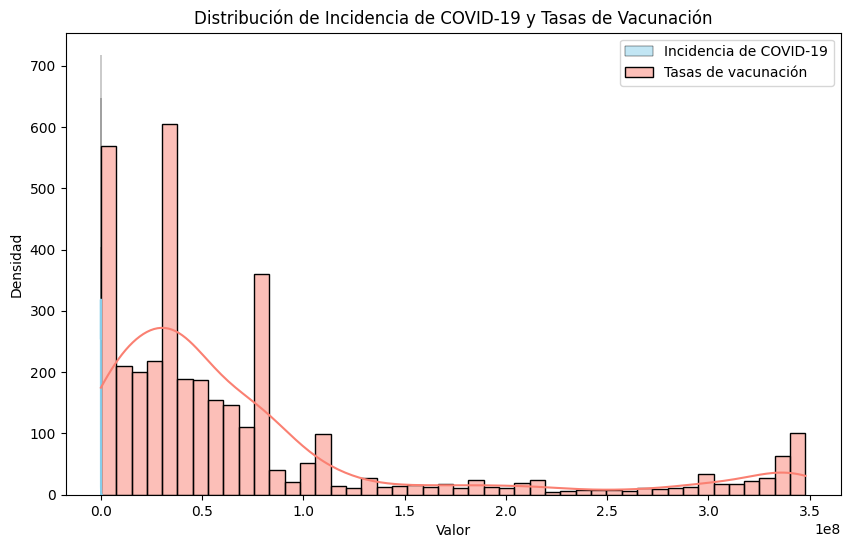

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['new_confirmed'], kde=True, color='skyblue', label='Incidencia de COVID-19')
sns.histplot(data_clean['cumulative_vaccine_doses_administered'], kde=True, color='salmon', label='Tasas de vacunación')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Distribución de Incidencia de COVID-19 y Tasas de Vacunación')
plt.legend(loc='upper right')  # Especifica la ubicación de la leyenda
plt.show()


### Matriz de correlación, trata de crear una submascara para solo tomar una parte del gráfico y filtrar por los valores mayores a 0.5.

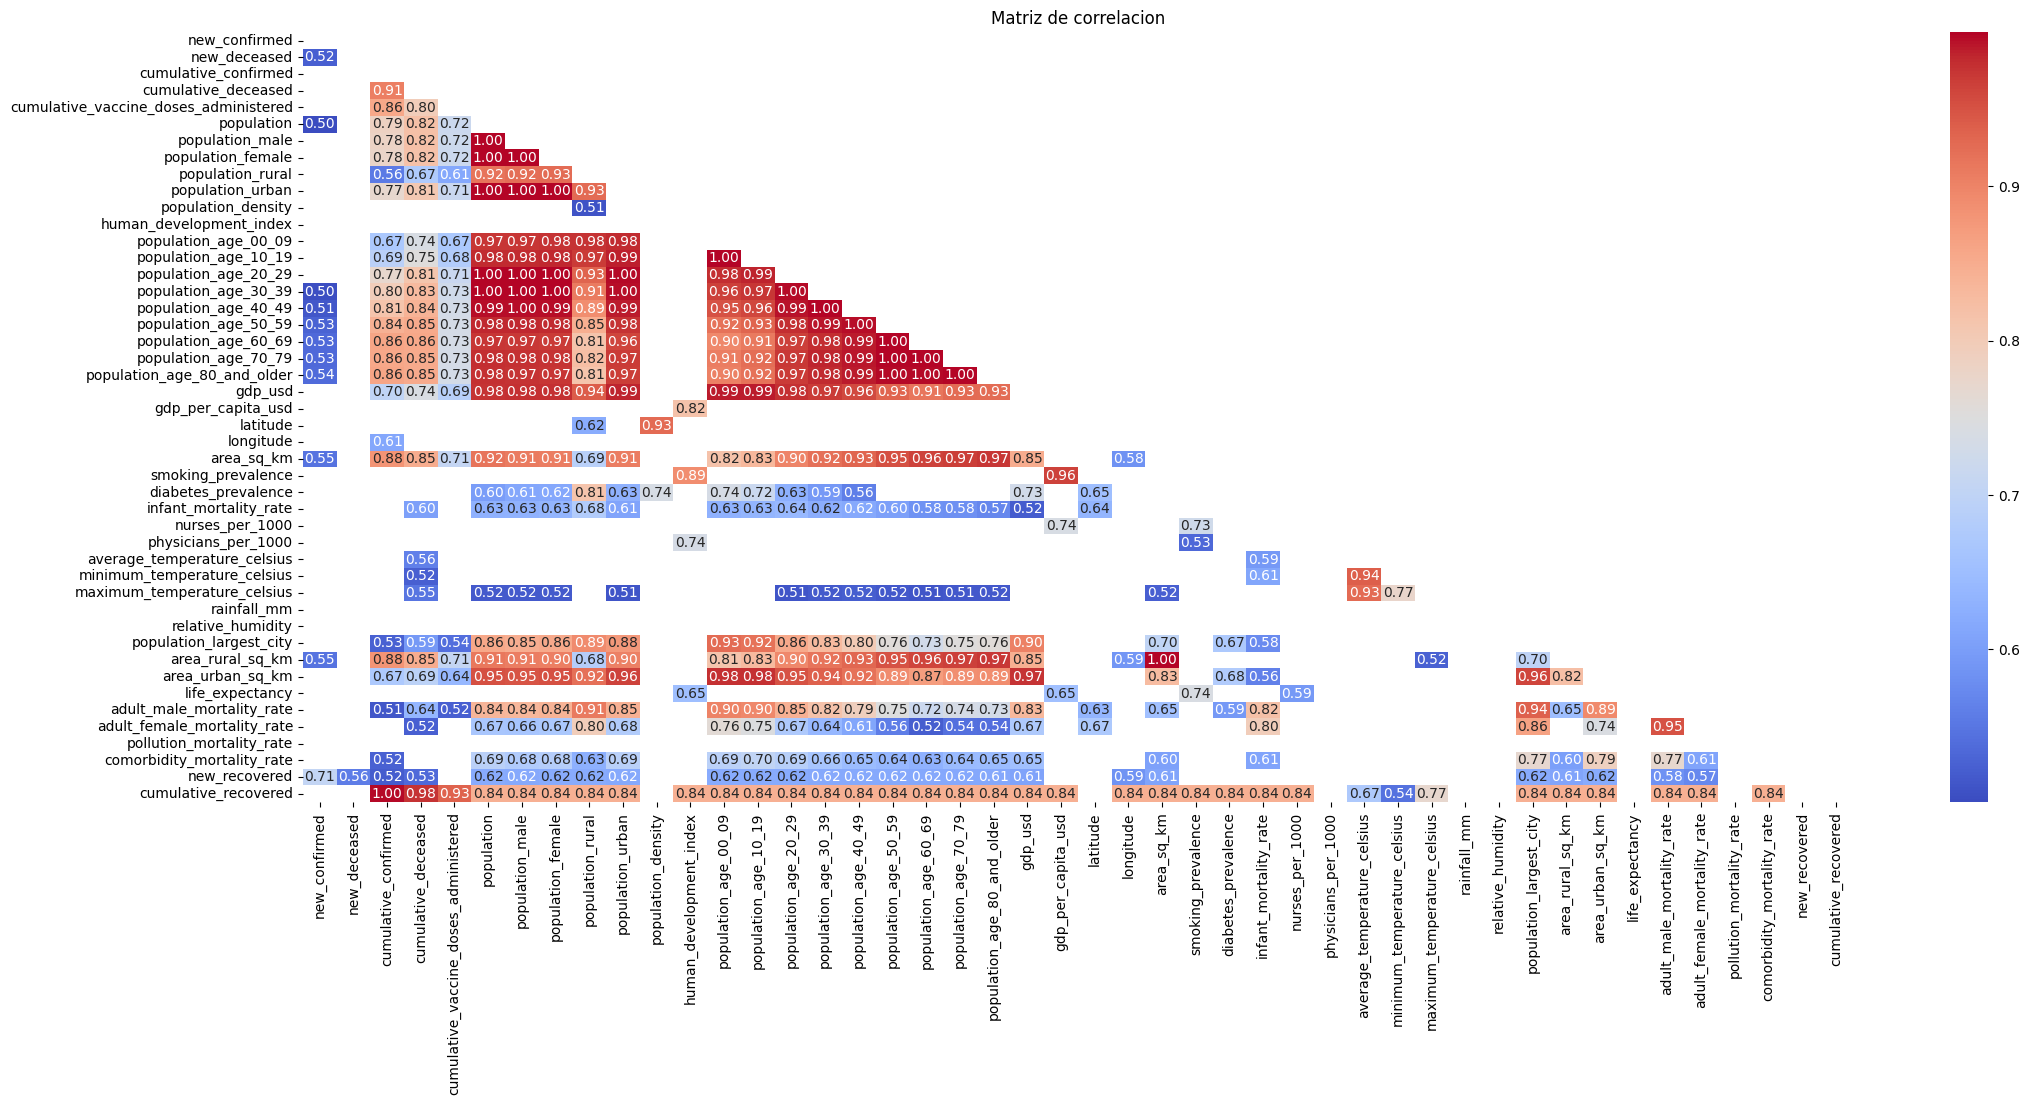

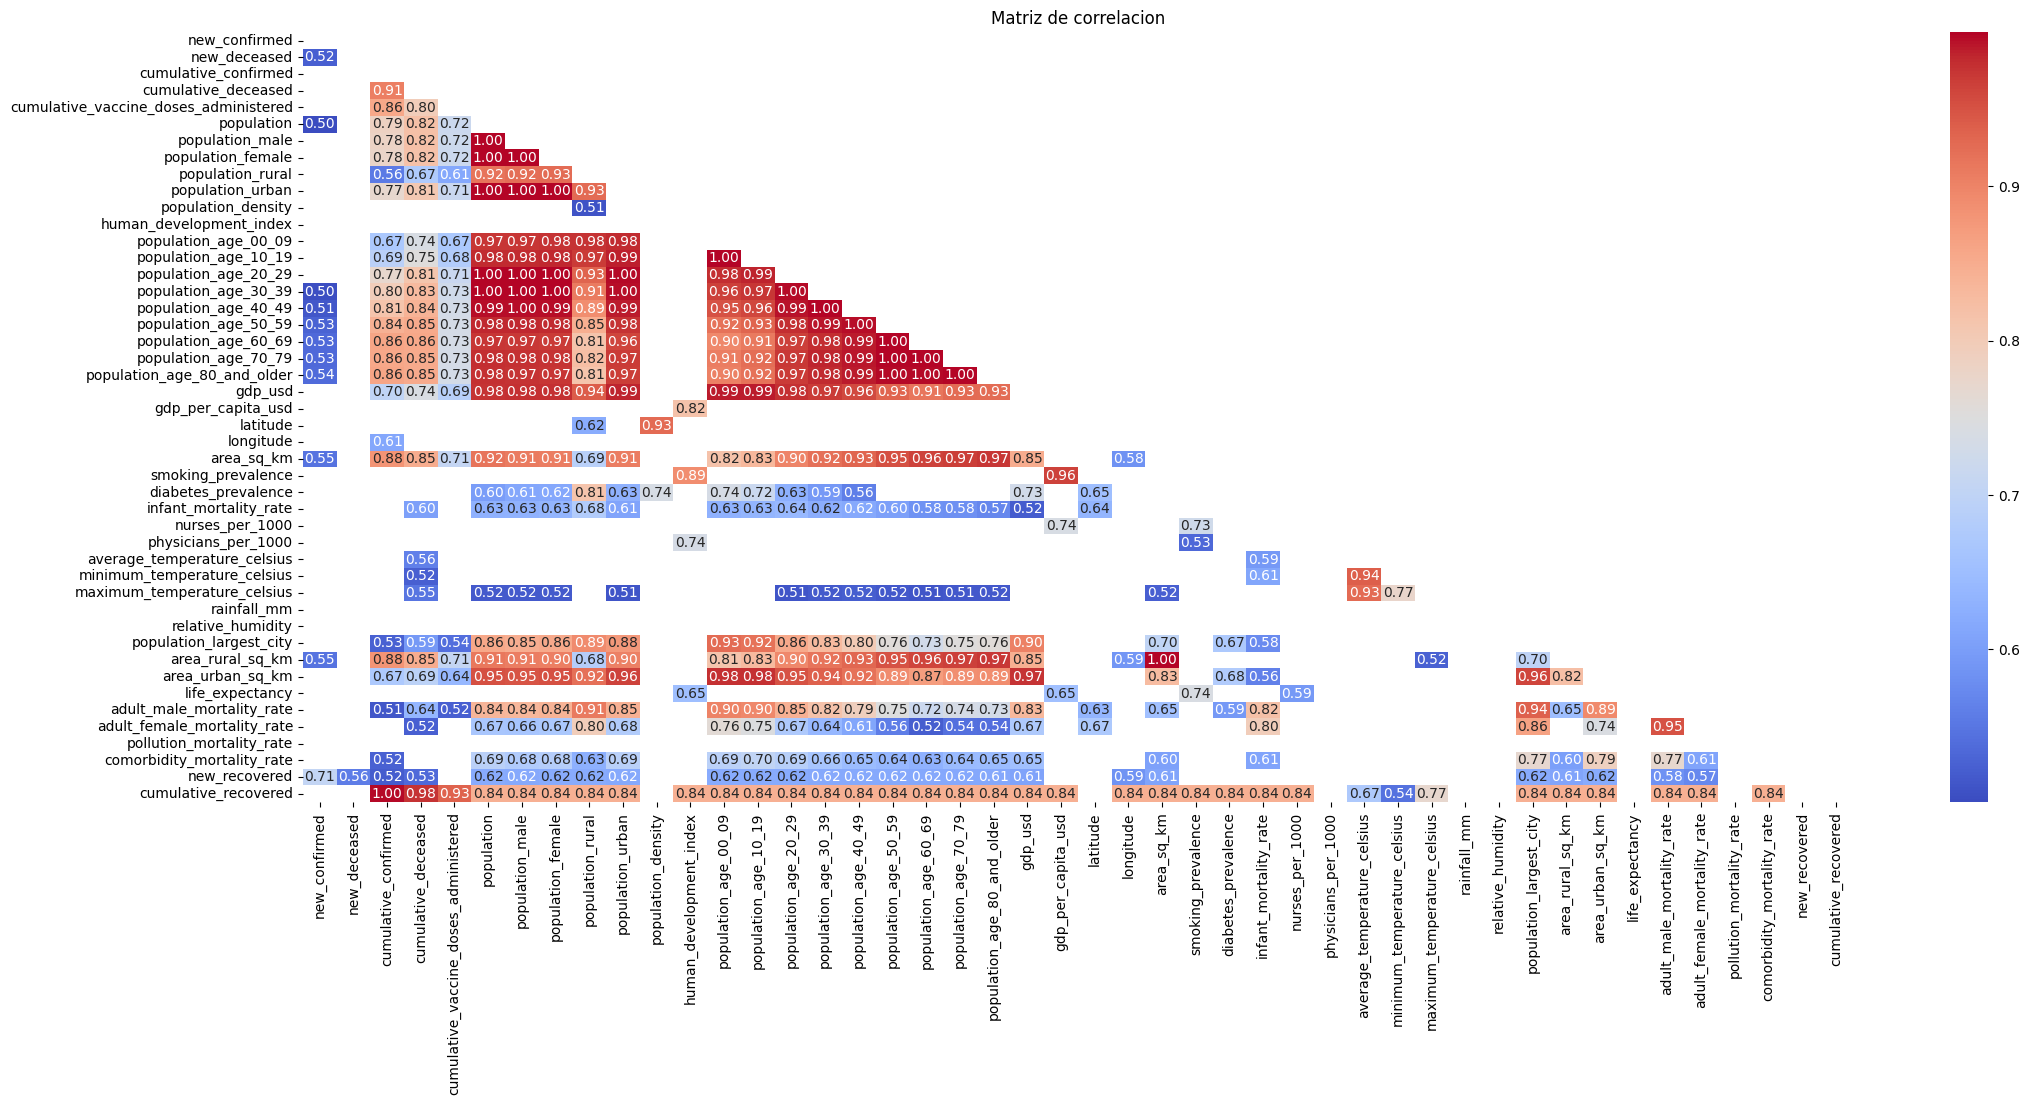

In [20]:
# variables numericas
numeric_columns = data_clean.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_clean[numeric_columns].corr()

# Creamos la mascara ara el triangulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype = bool))  

# Creamos valores mayores a 0.5
correlation_matrix = correlation_matrix.abs()[(correlation_matrix)> abs(0.5)]

# Grafico
plt.figure(figsize= (25,10))
heatmap = sns.heatmap(correlation_matrix, mask = mask, annot = True, cmap= 'coolwarm', fmt=".2f")
plt.title ('Matriz de correlacion')
plt.show()

# variables numericas
numeric_columns = data_clean.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_clean[numeric_columns].corr()
correlation_matrix['new_confirmed']
# Creamos la mascara ara el triangulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype = bool))  

# Creamos valores mayores a 0.5
correlation_matrix = correlation_matrix.abs()[(correlation_matrix)> abs(0.5)]

# Grafico
plt.figure(figsize= (25,10))
heatmap = sns.heatmap(correlation_matrix, mask = mask, annot = True, cmap= 'coolwarm', fmt=".2f")
plt.title ('Matriz de correlacion')
plt.show()  


### Nuevos confirmados por pais

In [21]:
fig, ax = plt.subplots(figsize= [5, 3])
sns.barplot(x='country_name', y='new_confirmed', data = data_clean, ax =ax, hue='country_name')
plt.title('Nuevos casos confirmados por pais')
plt.show()

Ahora que tenemos un codigo base, realizamos un ciclo for para responder la consulta de "Gráficos de barras de países contra el resto de variables."


C:\Users\User\AppData\Local\Temp\ipykernel_12472\3735496396.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig. ax = plt.subplots(figsize = (6,3))


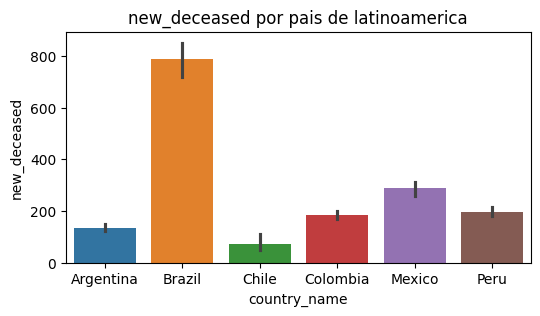

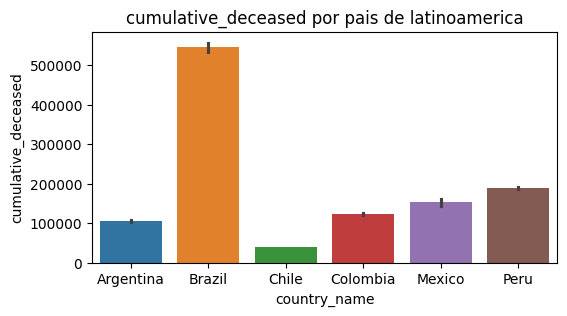

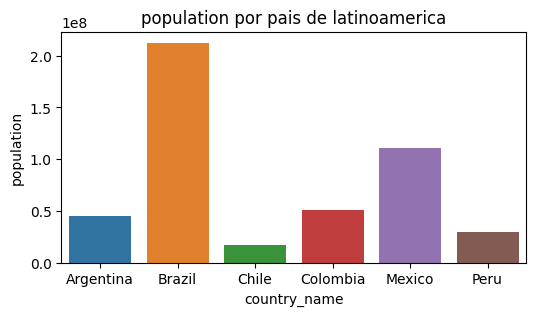

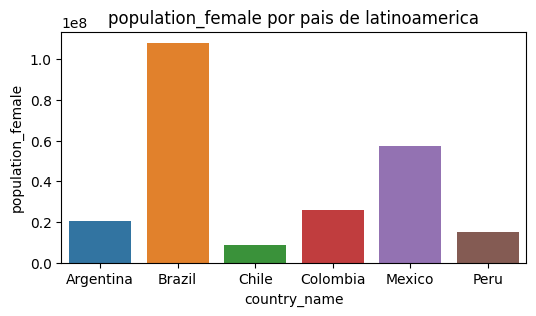

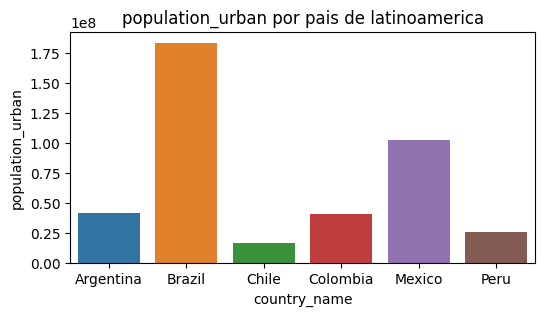

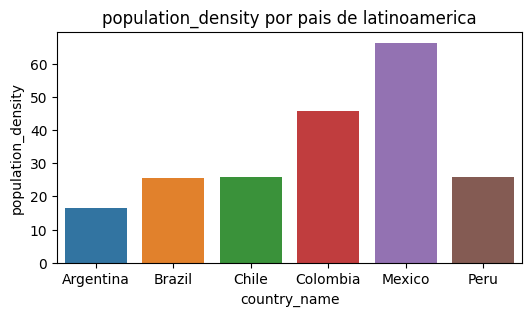

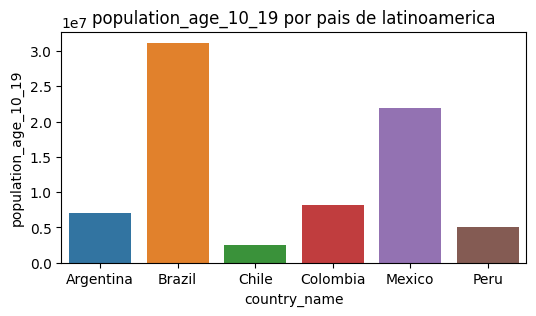

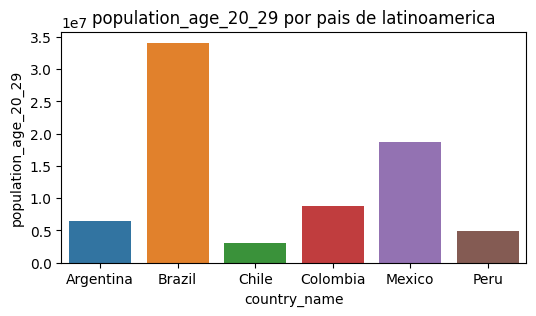

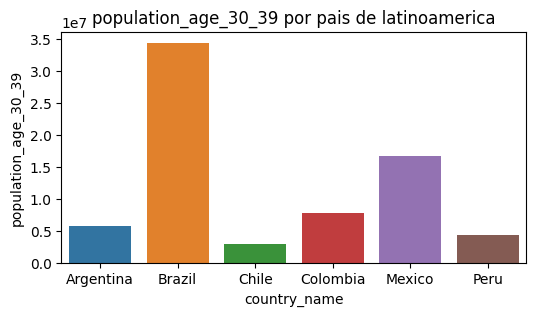

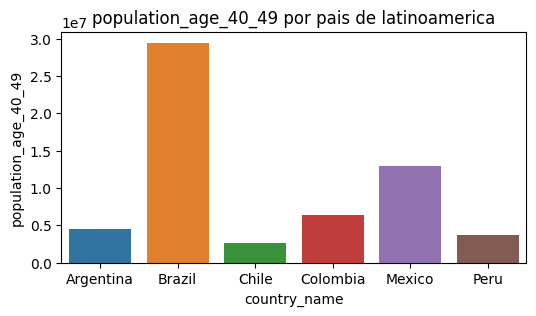

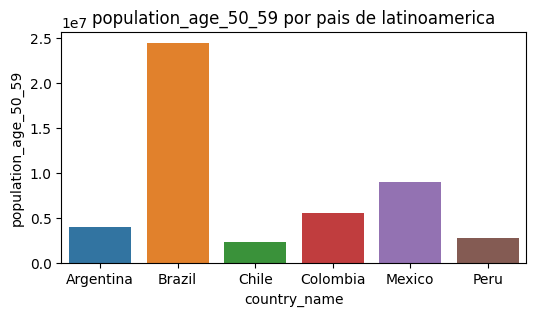

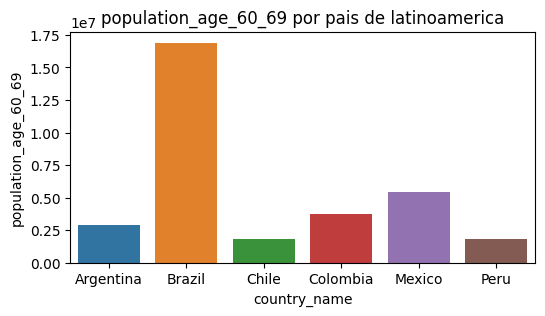

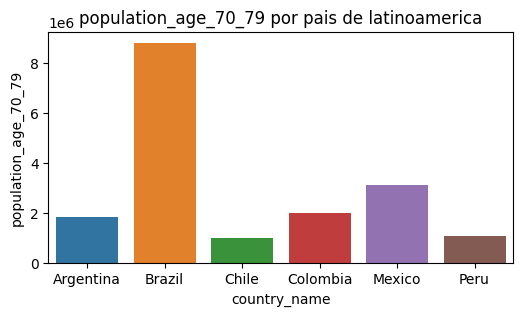

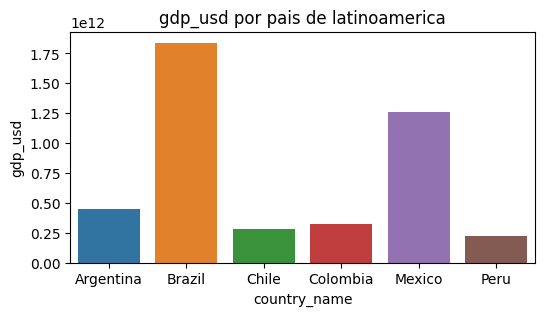

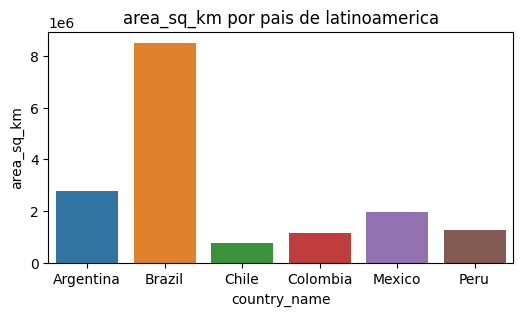

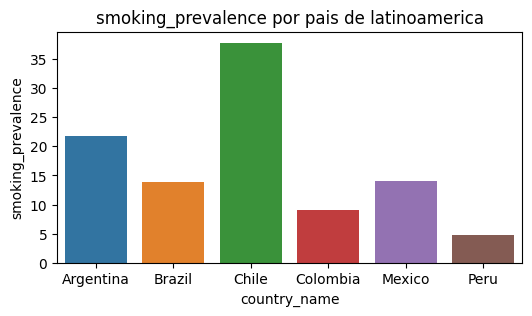

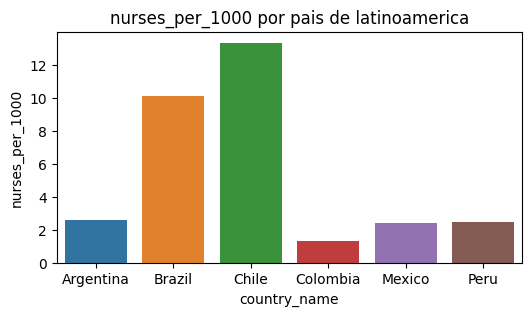

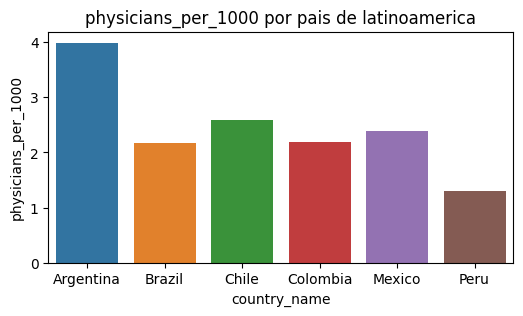

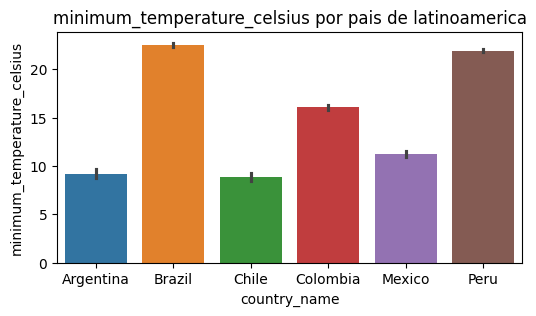

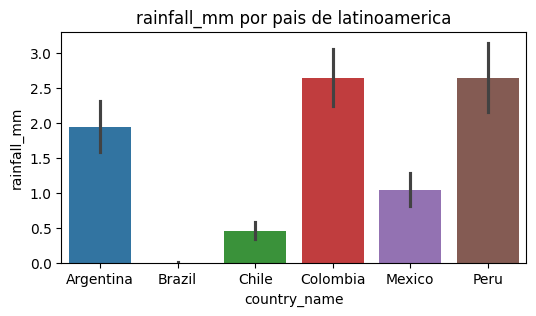

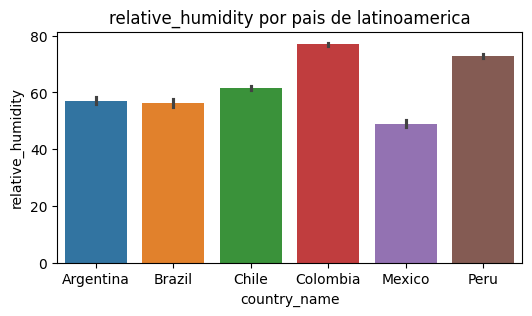

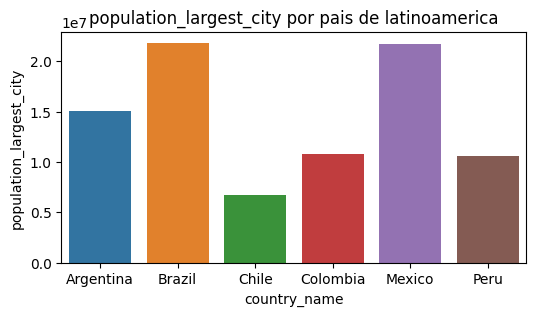

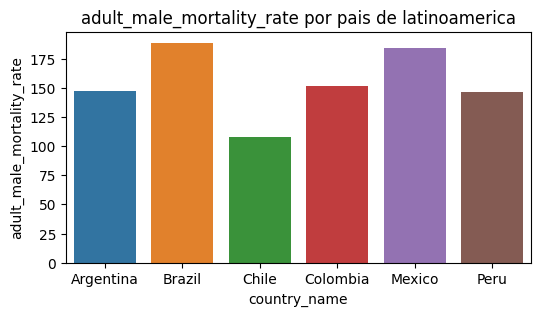

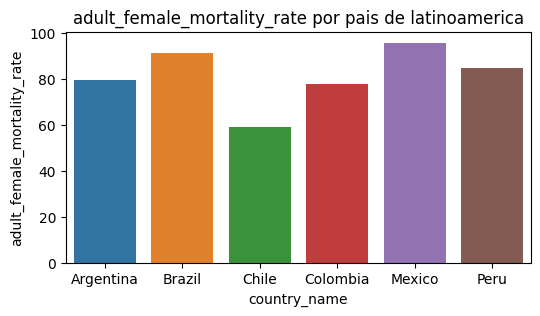

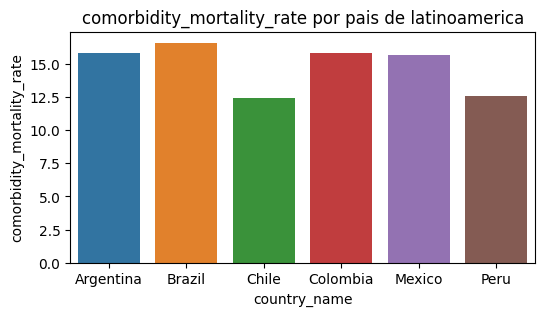

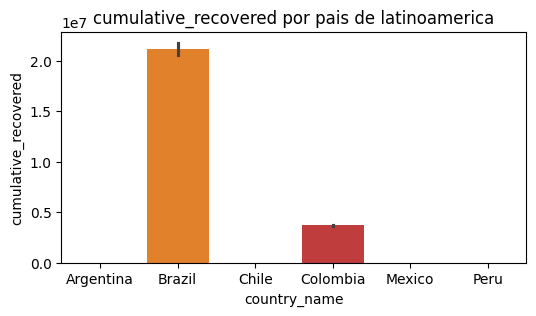

In [22]:
for i in data_clean.columns:
    if i not in ['location_key','date','country_name','latitude', 'longitude', 'cumulative_confirmed','cumulative_confir','cumulative_recovery','country_code']:
        fig. ax = plt.subplots(figsize = (6,3))
        sns.barplot(x='country_name', y=i, data = data_clean, hue= 'country_name')
        plt.title(f'{i} por pais de latinoamerica')
        plt.show

Los graficos demuestran la prevalencia de Brasil en los indicadores. Demostrando ser el mercado mas grande 

### Histogramas de las variables que “Sí” tenga cambios de valores.


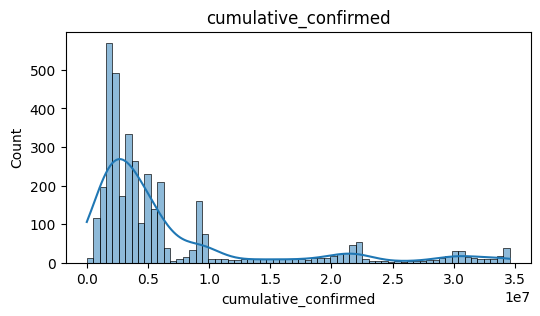

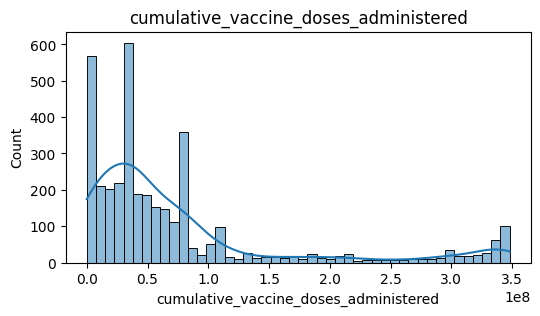

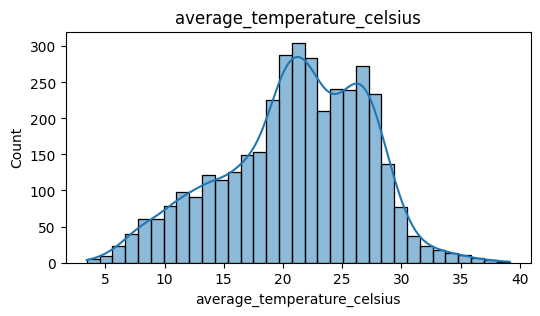

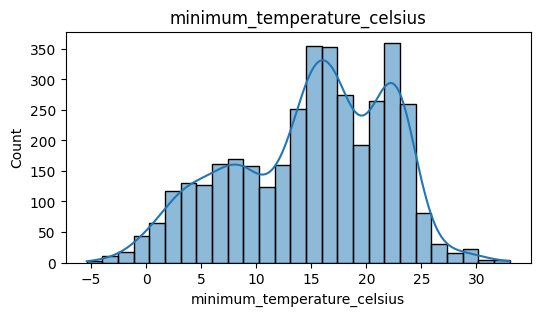

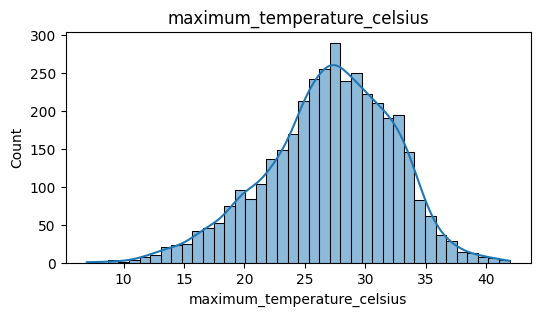

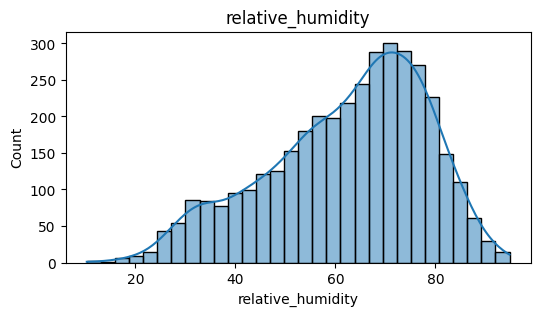

In [23]:
# Selecciona las columnas relevantes con cambios de valores
columns_6 = ['new_confirmed', 'cumulative_confirmed', 'new_deceased', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius', 'relative_humidity']

# Creamos histogramas con for
for i in data_clean[columns_6]:
    fig, ax = plt.subplots(figsize = (6,3))
    sns.histplot(data_clean[i], kde= True )
    plt.title(i)
    plt.show()

### Diagrama de dispersión de la temperatura media contra los casos confirmados.

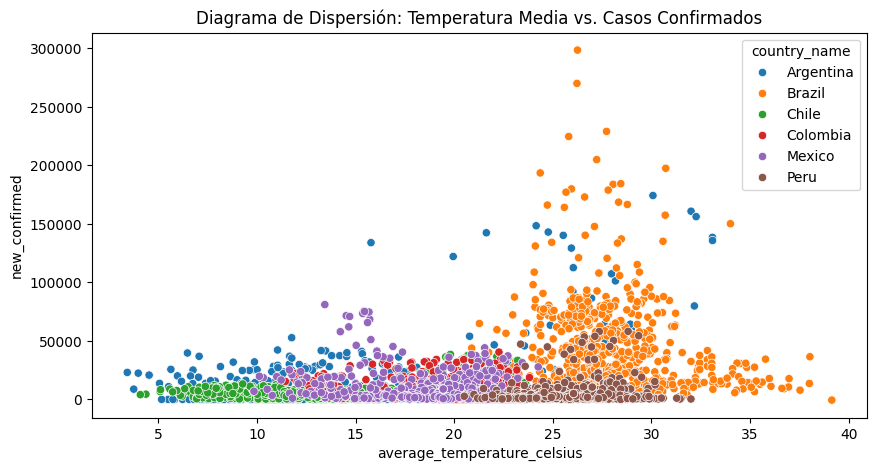

In [24]:
fig, ax = plt.subplots(figsize= (10,5))
sns.scatterplot(x='average_temperature_celsius', y= 'new_confirmed', data = data_clean, hue = 'country_name')
plt.title('Diagrama de Dispersión: Temperatura Media vs. Casos Confirmados')
plt.show()

Se puede observar que la temperatura predilecta para la transmision del COVID es entre 25º y 30º Cº

### Diagrama de dispersión de la temperatura media contra las muertes confirmadas.

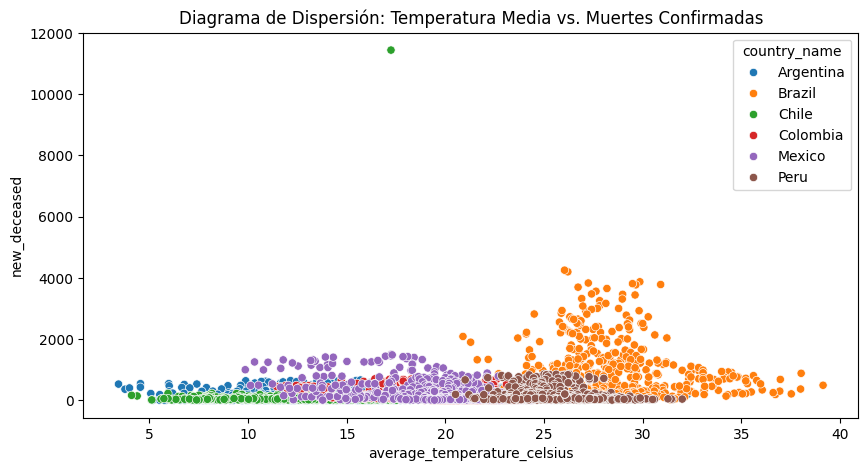

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='average_temperature_celsius', y= 'new_deceased', data = data_clean, hue = 'country_name')
plt.title('Diagrama de Dispersión: Temperatura Media vs. Muertes Confirmadas')
plt.show()

### Comportamiento de las dosis administradas de todos los países (Valor medio).

C:\Users\User\AppData\Local\Temp\ipykernel_12472\845485410.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_clean.resample('M').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()


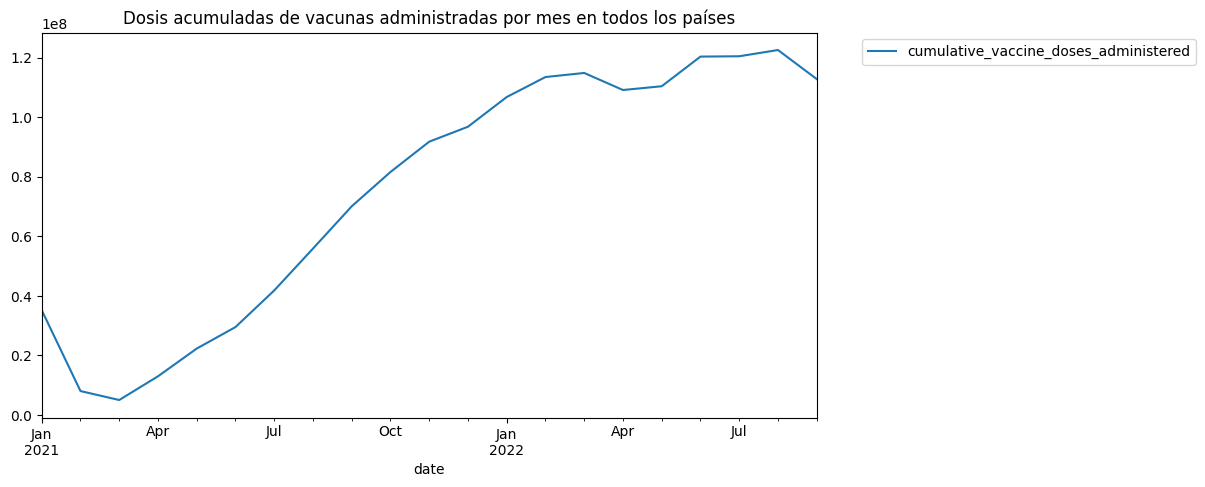

In [26]:
data_clean['fecha'] = pd.to_datetime(data_clean['date'])
data_clean['date'] = pd.to_datetime(data_clean['date'])
data_clean.set_index('date', inplace=True)

fig, ax = plt.subplots(figsize=(10, 5))
data_clean.resample('M').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Dosis acumuladas de vacunas administradas por mes en todos los países')
plt.show()

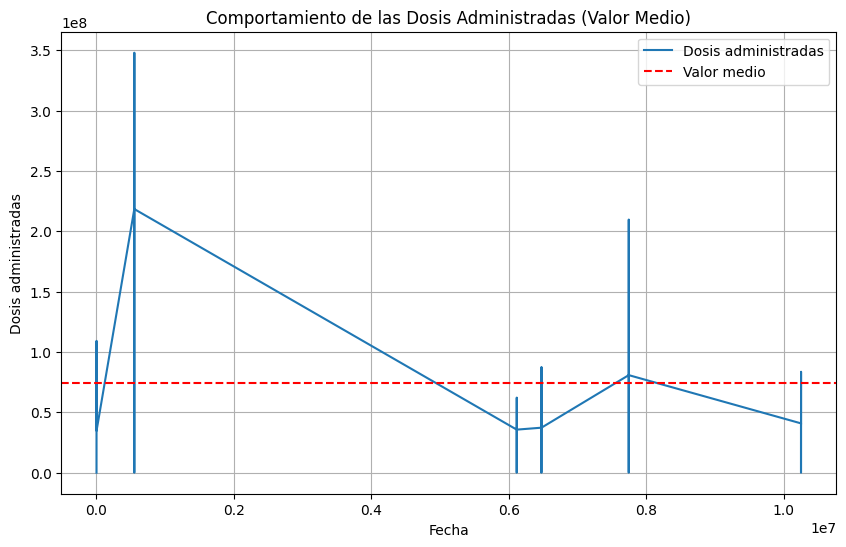

In [27]:
doses_administered = df_paises_2021['cumulative_vaccine_doses_administered']

# Calcula el valor medio de dosis administradas en todos los países
valor_medio_dosis = doses_administered.mean()

# Crea un gráfico de líneas para mostrar la evolución de las dosis
plt.figure(figsize=(10, 6))
plt.plot(doses_administered, label='Dosis administradas')
plt.axhline(valor_medio_dosis, color='red', linestyle='--', label='Valor medio')
plt.xlabel('Fecha')
plt.ylabel('Dosis administradas')
plt.title('Comportamiento de las Dosis Administradas (Valor Medio)')
plt.legend()
plt.grid(True)
plt.show()

### Calcula el valor medio de dosis administradas en todos los países

In [28]:
paises_seleccionados = ['Argentina', 'Brazil','Chile', 'Colombia' ,'Mexico' ,'Peru']

print(paises_seleccionados)


['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']


C:\Users\User\AppData\Local\Temp\ipykernel_12472\3074329670.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_clean[data_clean['country_name']== pais].resample('M').mean(numeric_only= True)['cumulative_vaccine_doses_administered'].plot()
C:\Users\User\AppData\Local\Temp\ipykernel_12472\3074329670.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_clean[data_clean['country_name']== pais].resample('M').mean(numeric_only= True)['cumulative_vaccine_doses_administered'].plot()
C:\Users\User\AppData\Local\Temp\ipykernel_12472\3074329670.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_clean[data_clean['country_name']== pais].resample('M').mean(numeric_only= True)['cumulative_vaccine_doses_administered'].plot()
C:\Users\User\AppData\Local\Temp\ipykernel_12472\3074329670.py:4: FutureWarning: 'M' is deprecated a

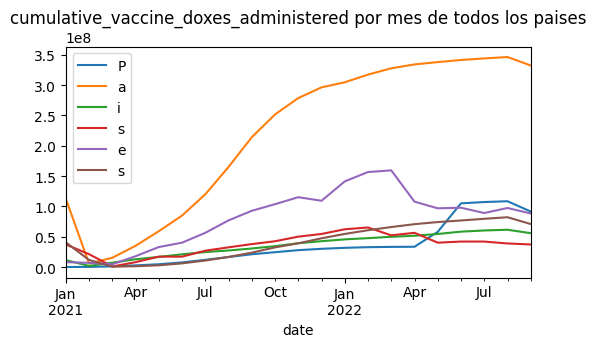

In [38]:
### Dosis acumuladas
fig, ax = plt.subplots(figsize=(6, 3))
for pais in paises_seleccionados:
    data_clean[data_clean['country_name']== pais].resample('M').mean(numeric_only= True)['cumulative_vaccine_doses_administered'].plot()

plt.legend(bbox_to_anchor= (1.05 , 1), loc = 'upper left')
plt.title('cumulative_vaccine_doxes_administered por mes de todos los paises')
plt.legend('Paises Seleccionados')
plt.show()


### Casos confirmados por mes de cada país.

C:\Users\User\AppData\Local\Temp\ipykernel_12472\3284513438.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_clean[data_clean['country_name']== pais].resample('M').mean(numeric_only= True)['cumulative_confirmed'].plot()
C:\Users\User\AppData\Local\Temp\ipykernel_12472\3284513438.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_clean[data_clean['country_name']== pais].resample('M').mean(numeric_only= True)['cumulative_confirmed'].plot()
C:\Users\User\AppData\Local\Temp\ipykernel_12472\3284513438.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_clean[data_clean['country_name']== pais].resample('M').mean(numeric_only= True)['cumulative_confirmed'].plot()
C:\Users\User\AppData\Local\Temp\ipykernel_12472\3284513438.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 

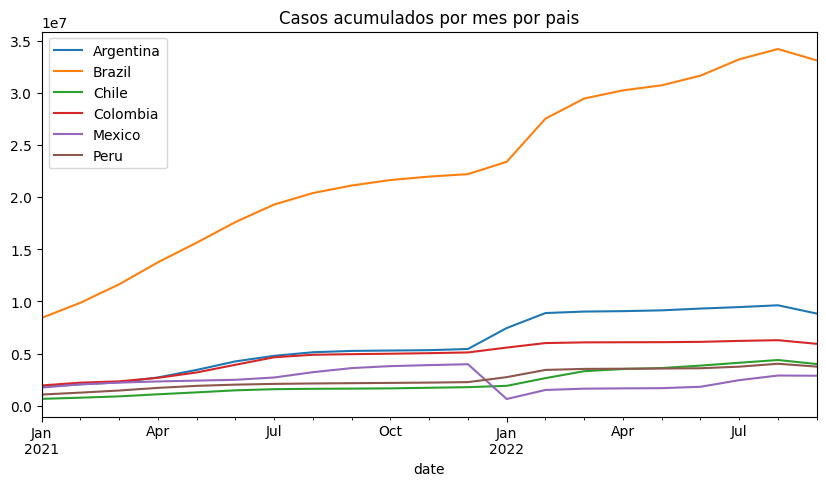

In [39]:
fig, ax = plt.subplots(figsize=(10 , 5))
for pais in paises_seleccionados:
    data_clean[data_clean['country_name']== pais].resample('M').mean(numeric_only= True)['cumulative_confirmed'].plot()

plt.title('Casos acumulados por mes por pais')
plt.legend(bbox_to_anchor= (1.05 , 1), loc = 'upper left')
plt.legend(paises_seleccionados)
plt.show()


Vemos a Brasil con la mayor cantidad de casos confirmados, lo que indica una mayor necesidad de atencion

### Casos confirmados por mes por pais

C:\Users\User\AppData\Local\Temp\ipykernel_12472\1528826943.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_clean[data_clean['country_name']== pais].resample('M').mean(numeric_only= True)['cumulative_deceased'].plot()
C:\Users\User\AppData\Local\Temp\ipykernel_12472\1528826943.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_clean[data_clean['country_name']== pais].resample('M').mean(numeric_only= True)['cumulative_deceased'].plot()
C:\Users\User\AppData\Local\Temp\ipykernel_12472\1528826943.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_clean[data_clean['country_name']== pais].resample('M').mean(numeric_only= True)['cumulative_deceased'].plot()
C:\Users\User\AppData\Local\Temp\ipykernel_12472\1528826943.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME

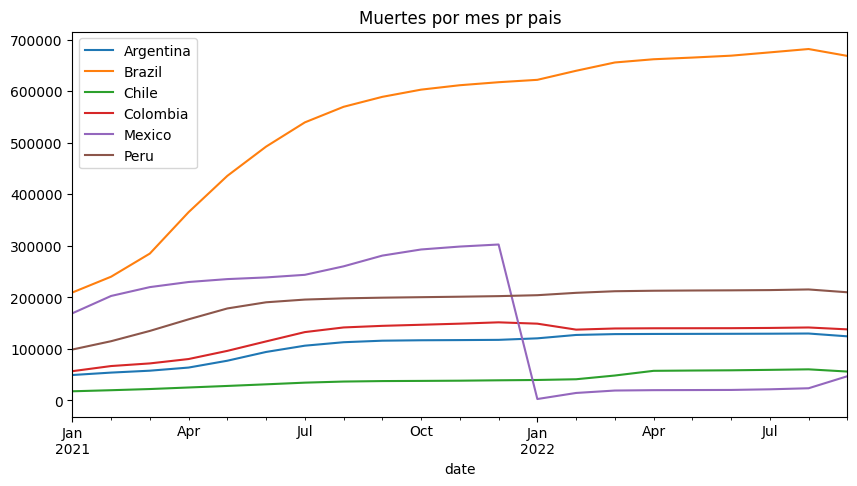

In [32]:
fig, ax = plt.subplots(figsize=(10 , 5))
for pais in paises_seleccionados:
    data_clean[data_clean['country_name']== pais].resample('M').mean(numeric_only= True)['cumulative_deceased'].plot()

plt.legend(bbox_to_anchor= (1.05 , 1), loc = 'upper left')
plt.title('Muertes por mes pr pais')
plt.legend(paises_seleccionados)
plt.show()


Vemos a Brasil con la mayor cantidad de fatalidades, lo que indica una mayor necesidad de atencion

### Casos recuperados por mes por pais

C:\Users\User\AppData\Local\Temp\ipykernel_12472\3364758337.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_clean[data_clean['country_name']== pais].resample('M').mean(numeric_only= True)['cumulative_recovered'].plot()
C:\Users\User\AppData\Local\Temp\ipykernel_12472\3364758337.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_clean[data_clean['country_name']== pais].resample('M').mean(numeric_only= True)['cumulative_recovered'].plot()
C:\Users\User\AppData\Local\Temp\ipykernel_12472\3364758337.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_clean[data_clean['country_name']== pais].resample('M').mean(numeric_only= True)['cumulative_recovered'].plot()
C:\Users\User\AppData\Local\Temp\ipykernel_12472\3364758337.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 

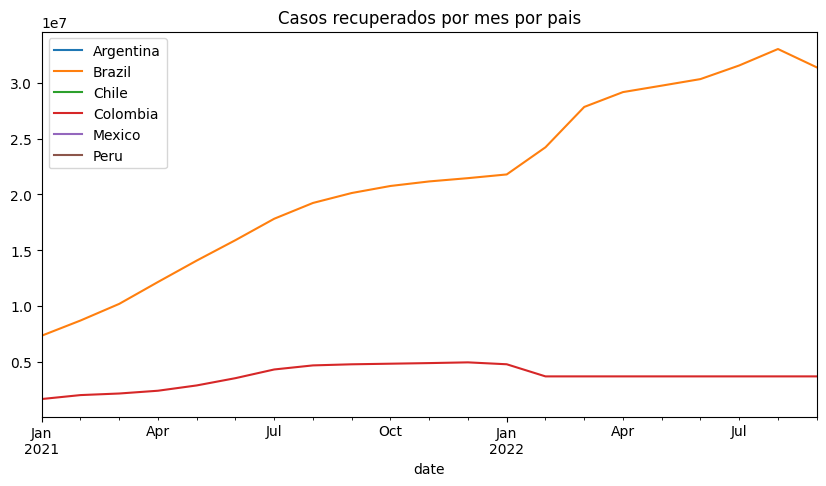

In [33]:
fig, ax = plt.subplots(figsize=(10 , 5))
for pais in paises_seleccionados:
    data_clean[data_clean['country_name']== pais].resample('M').mean(numeric_only= True)['cumulative_recovered'].plot()

plt.legend(bbox_to_anchor= (1.05 , 1), loc = 'upper left')
plt.title('Casos recuperados por mes por pais')
plt.legend(paises_seleccionados)
plt.show()


### Casos nuevos por paises

C:\Users\User\AppData\Local\Temp\ipykernel_12472\1844620975.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_clean[data_clean['country_name']== pais].resample('M').mean(numeric_only= True)['new_confirmed'].plot()
C:\Users\User\AppData\Local\Temp\ipykernel_12472\1844620975.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_clean[data_clean['country_name']== pais].resample('M').mean(numeric_only= True)['new_confirmed'].plot()
C:\Users\User\AppData\Local\Temp\ipykernel_12472\1844620975.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_clean[data_clean['country_name']== pais].resample('M').mean(numeric_only= True)['new_confirmed'].plot()
C:\Users\User\AppData\Local\Temp\ipykernel_12472\1844620975.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_

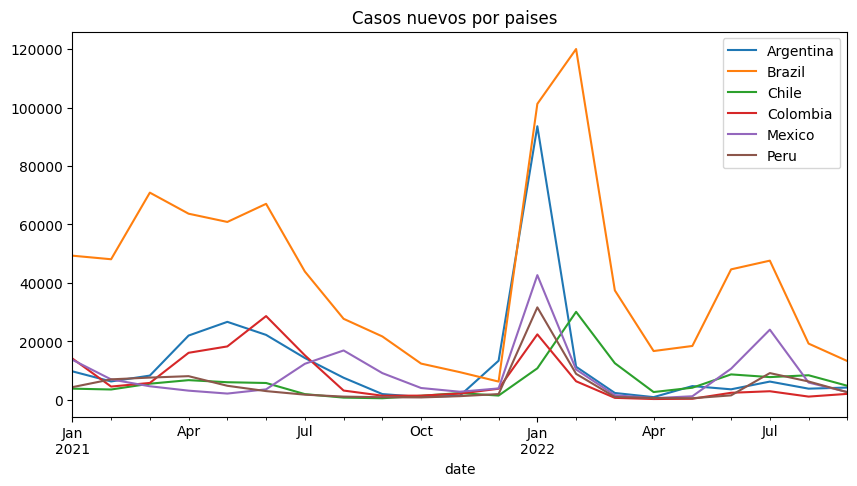

In [34]:
fig, ax = plt.subplots(figsize=(10 , 5))
for pais in paises_seleccionados:
    data_clean[data_clean['country_name']== pais].resample('M').mean(numeric_only= True)['new_confirmed'].plot()

plt.title('Casos nuevos por paises  ')
plt.legend(bbox_to_anchor= (1.05 , 1), loc = 'upper left')
plt.legend(paises_seleccionados)
plt.show()


Vemos que despues de Enero 2022 las cifrans llegan a un pico y despues bajan abruptamente. 
Señales cohincidentes de feistas de fin de año y a la vez de una mayor cantiodad de dosis otorgadas enesa epoca

### Distribucion de dosis acumuladas por pais

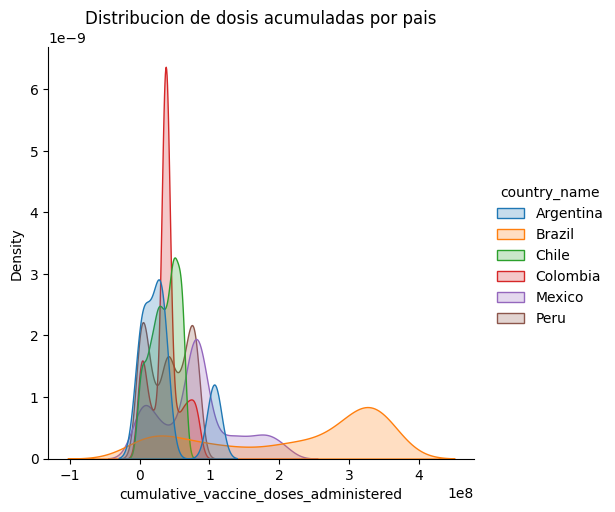

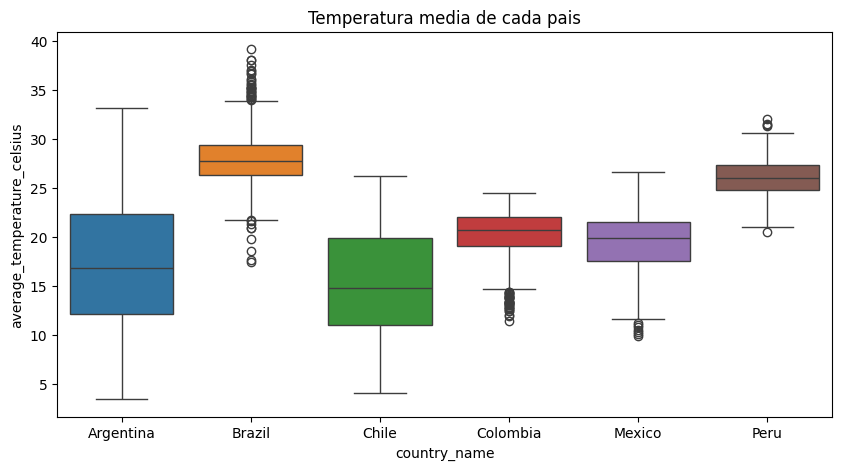

In [35]:
sns.displot(data_clean, x= 'cumulative_vaccine_doses_administered', hue= 'country_name', kind = 'kde', fill = True)
plt.title('Distribucion de dosis acumuladas por pais')
### Boxplot de temperatura media de cada país.

fig, ax = plt.subplots(figsize= (10,5))
sns.boxplot(x='country_name', y='average_temperature_celsius', data= data_clean, hue = 'country_name')
plt.title('Temperatura media de cada pais')
plt.show()


### Violinplot de las variables que “Sí” tenga cambios de valores.

In [36]:
columnas_mayores_6=[]
for i in data_clean:
    if i not in ['location_key','date', 'country_code', 'latitude', 'longitude']: 
        if data_clean[i].nunique()>6:
            columnas_mayores_6.append(i)

# agregamos paises 
columnas_mayores_6.append('country_name')

# Se crea un daaframe con las columnas mayores a 6

data_paises_mayores_6 = data_clean[columnas_mayores_6]


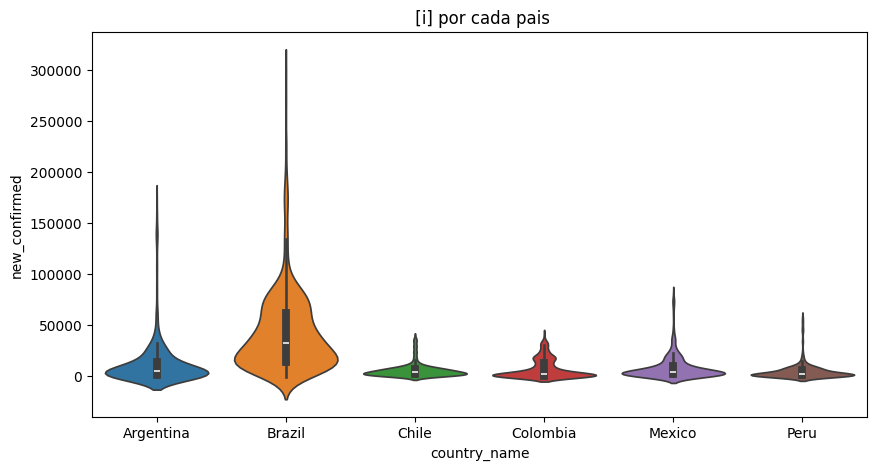

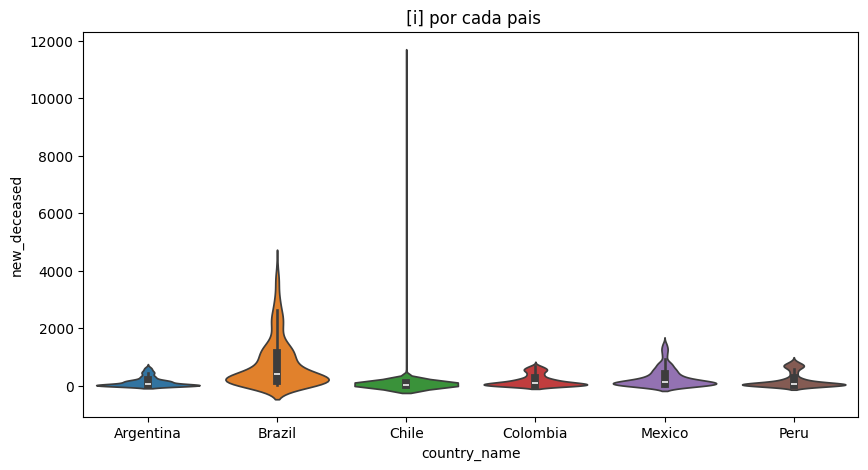

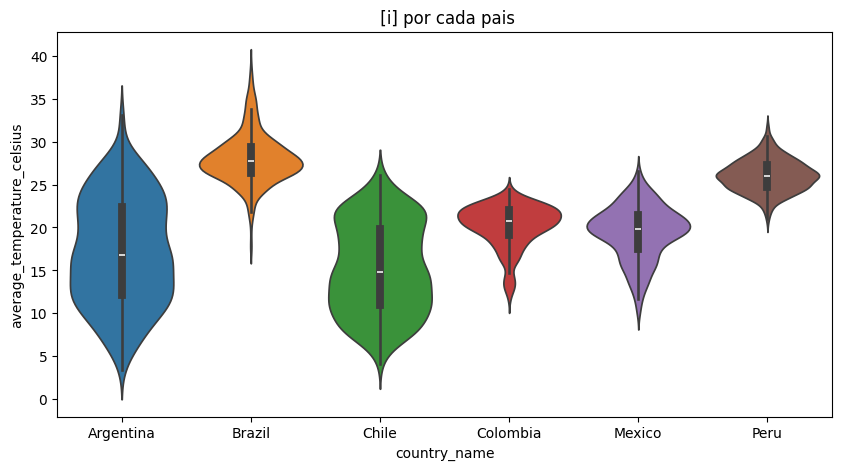

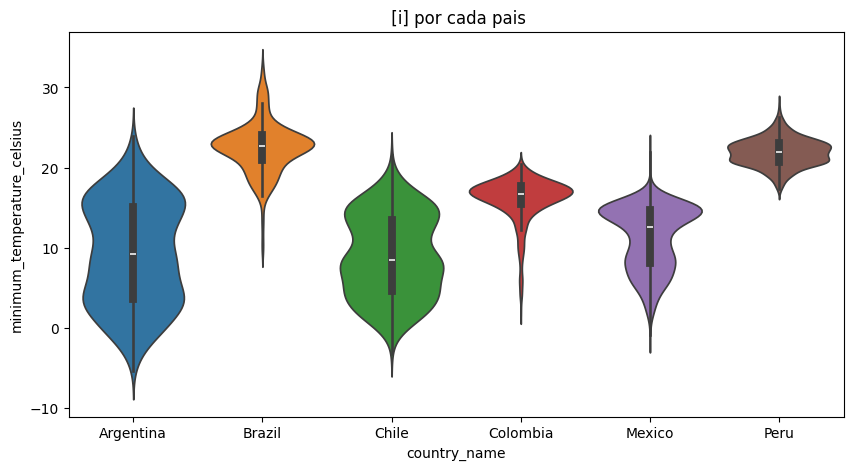

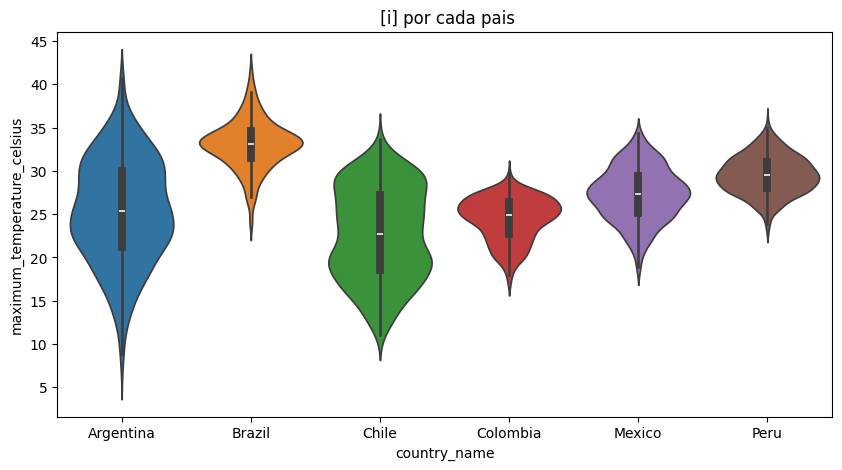

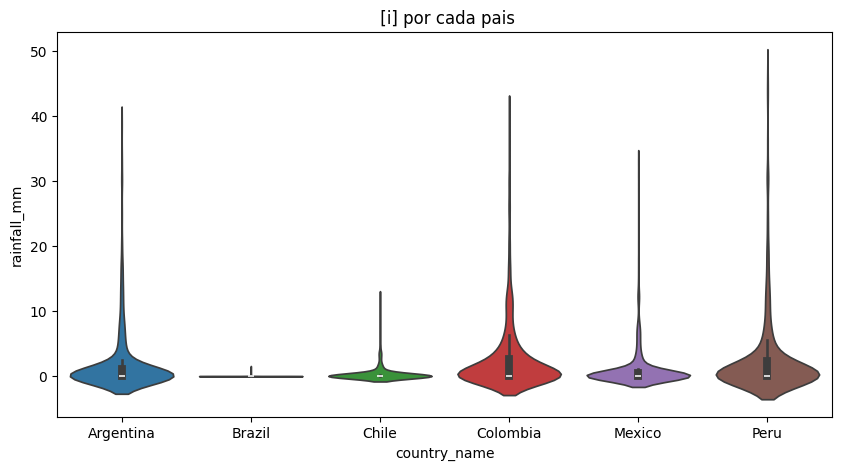

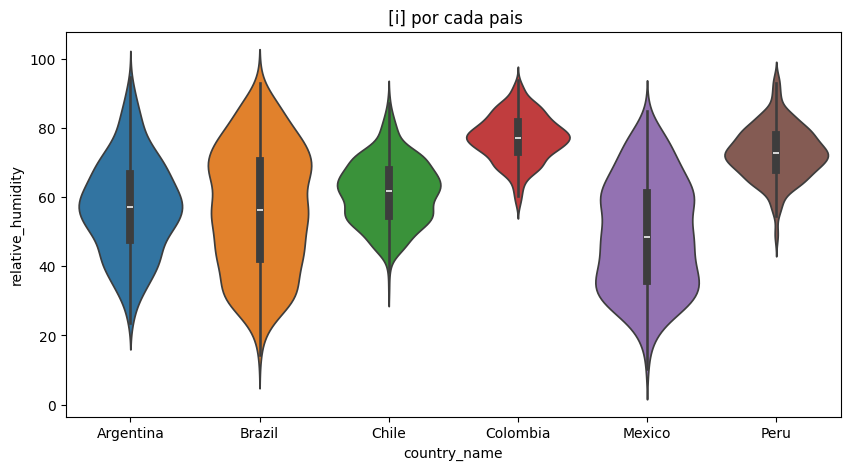

ValueError: cannot reindex on an axis with duplicate labels

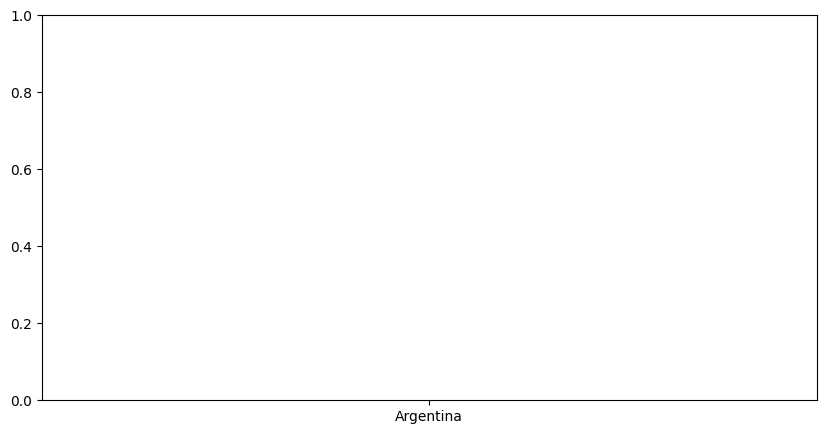

In [37]:
# violinplot en todos los paises 

for i in data_paises_mayores_6:
    if i not in ['location_key','date', 'country_code', 'latitude', 'longitude', 'country_name']:
        fig, ax= plt.subplots(figsize = (10 , 5))
        sns.violinplot(x = 'country_name', y = i, data = data_paises_mayores_6, hue = 'country_name')
        plt.title(f' [i] por cada pais')
        plt.show()



### Distribución de la población por grupos de edad.

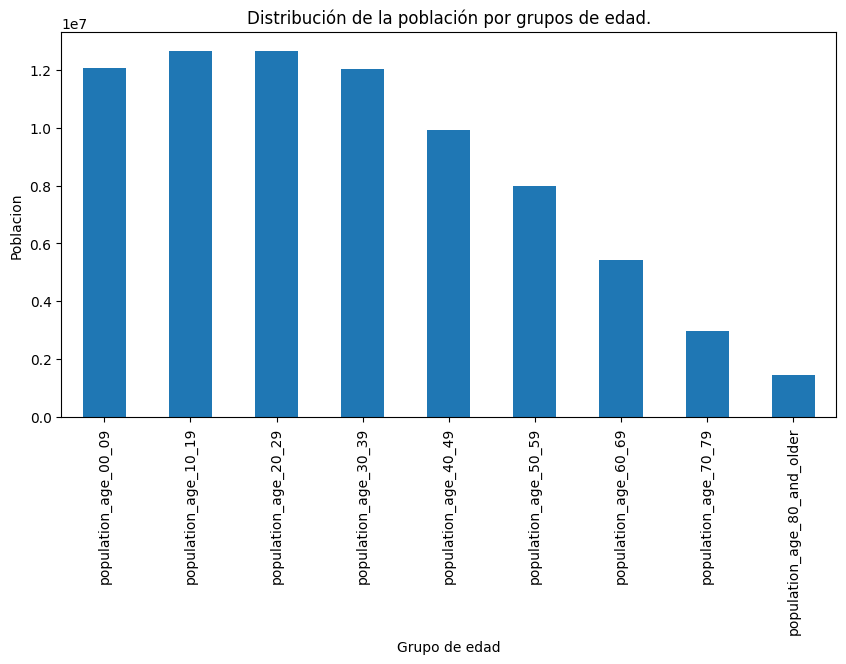

In [40]:
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older']

distribucion_edad= data_clean[age_columns].mean()

plt.figure (figsize = (10,5))
distribucion_edad.plot(kind= 'bar', stacked= True)
plt.xlabel('Grupo de edad')
plt.ylabel('Poblacion')
plt.title('Distribución de la población por grupos de edad.')
plt.show()


### Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país


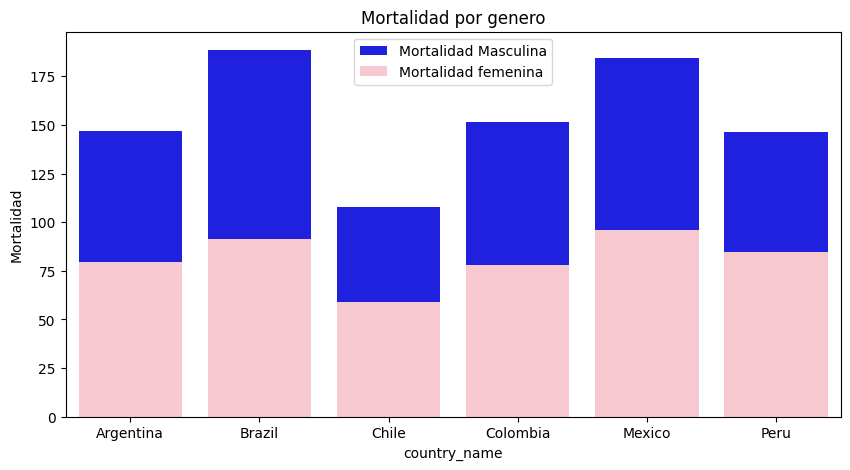

In [41]:
plt.figure(figsize= (10,5))
sns.barplot(data_clean, x='country_name', y= 'adult_male_mortality_rate', color = 'blue', label = 'Mortalidad Masculina')
sns.barplot(data_clean, x='country_name', y= 'adult_female_mortality_rate', color = 'pink', label = 'Mortalidad femenina')
plt.ylabel('Mortalidad')
plt.title('Mortalidad por genero')
plt.show()  


### Matriz de correlación de indicadores demográficos y de salud.	

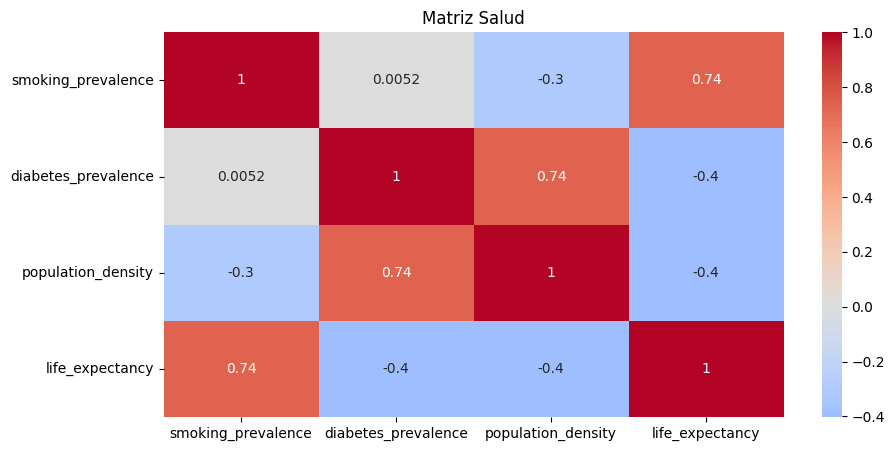

In [42]:
# Elegir columnas especificas
columnas_salud = ['smoking_prevalence', 'diabetes_prevalence','population_density', 'life_expectancy']
matriz_relacion = data_clean[columnas_salud].corr()
plt.figure(figsize = (10,5))
sns.heatmap(matriz_relacion, annot = True, cmap ='coolwarm', center = 0)
plt.title('Matriz Salud')
plt.show()

### Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad

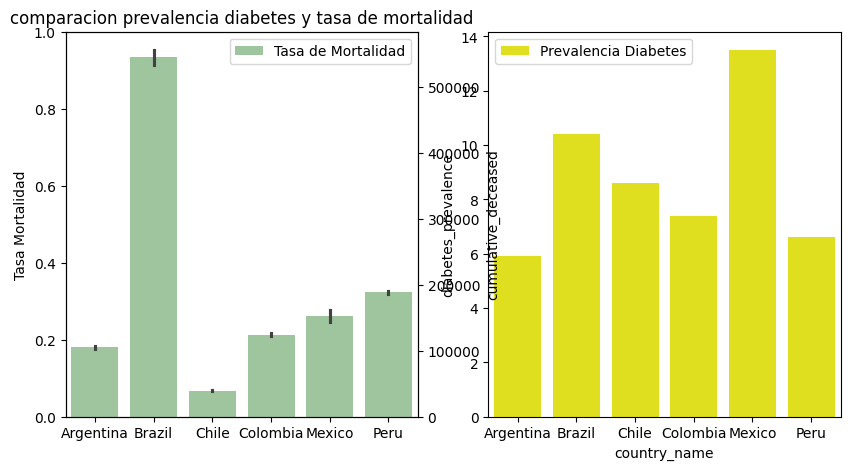

In [43]:
fig, (ax ,ax2) = plt.subplots(1, 2, figsize = (10,5))
sns.barplot(data = data_clean, x= data_clean['country_name'], y = data_clean['diabetes_prevalence'], color = 'yellow', label = 'Prevalencia Diabetes' )
ax2 = ax.twinx()
sns.barplot(data = data_clean, x= data_clean['country_name'], y = data_clean['cumulative_deceased'], color = 'green', label = 'Tasa de Mortalidad', ax=ax2, alpha = 0.4)

plt.xticks(rotation =90)
ax.set_ylabel('Prevalencia Diabetes')
ax.set_ylabel('Tasa Mortalidad')
plt.title('comparacion prevalencia diabetes y tasa de mortalidad')
plt.show()



# Avance 3

In [ ]:
# cargas necesarias para comenzar en Avance 2 y 3
data_clean = pd.read_csv('DatosFinalesFiltrado.csv')
data_clean['fecha'] = pd.to_datetime(data_clean['date'])
data_clean['date'] = pd.to_datetime(data_clean['date'])
data_clean.set_index('date', inplace=True)

### Evolucion casos nuevos semanales

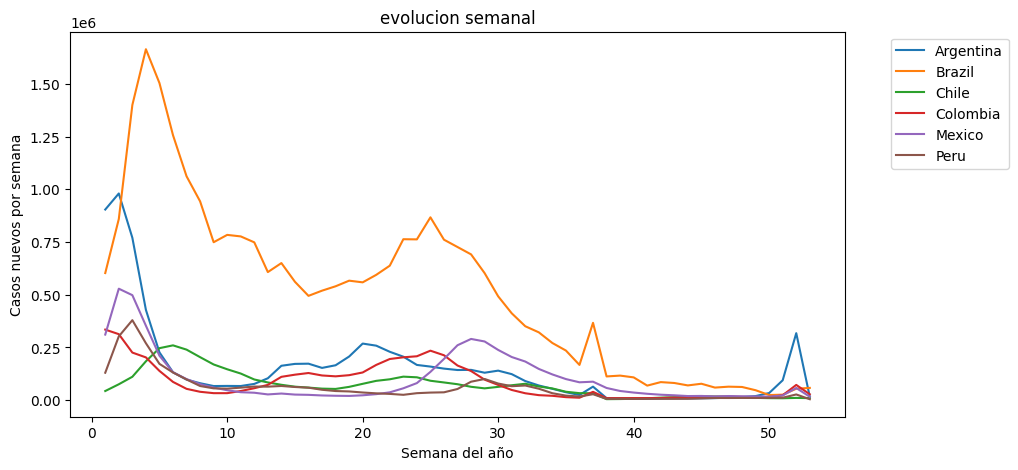

In [44]:
data_clean['week']= data_clean.index.isocalendar().week
data_clean['year']= data_clean.index.isocalendar().year
casos_semanales = data_clean.groupby(['country_name', 'week'])['new_confirmed'].sum().reset_index()

plt.figure(figsize = (10,5))
for country in casos_semanales['country_name'].unique():
    paises_casos_semanales= casos_semanales[casos_semanales['country_name']== country]
    plt.plot(paises_casos_semanales['week'], paises_casos_semanales['new_confirmed'], label = country)

plt.xlabel('Semana del año')
plt.ylabel('Casos nuevos por semana')
plt.title('evolucion semanal')
plt.legend(bbox_to_anchor = (1.05 , 1), loc = 'upper left')
plt.show()


### Evolución anual de casos nuevos

In [45]:
data_clean['month']= data_clean.index.month
casos_mensuales = data_clean.groupby(['country_name', 'month'])['new_confirmed'].sum().reset_index()

plt.figure(figsize = (10,5))
for country in casos_mensuales['country_name'].unique():
    paises_casos_mensuales= casos_mensuales[casos_mensuales['country_name']== country]
    plt.plot(paises_casos_mensuales['month'], paises_casos_mensuales['new_confirmed'], label = country)

plt.xlabel('meses')
plt.ylabel('Casos nuevos por mes')
plt.title('evolucion mensual')
plt.legend(bbox_to_anchor = (1.05 , 1), loc = 'upper left')
plt.show()


Enero siempre se muestra como el mes de mayor indice de contagios

### Evolucion recuperados

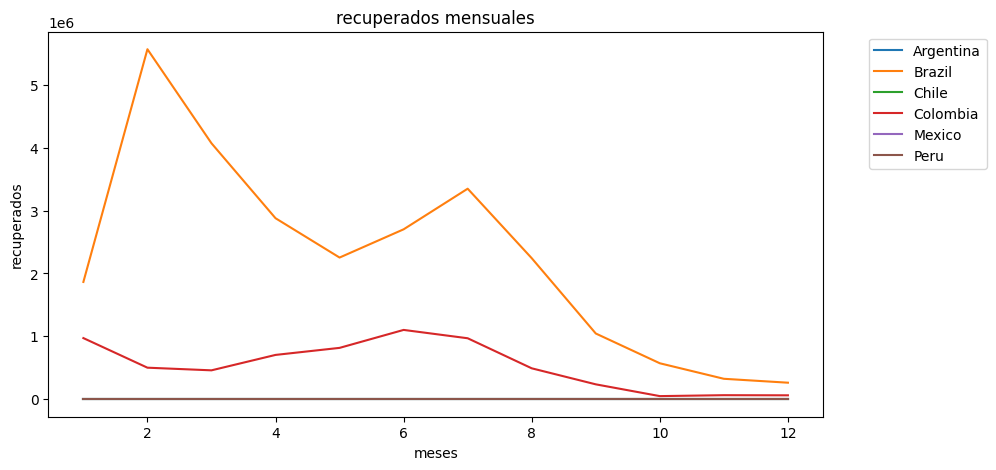

In [46]:
data_clean['month']= data_clean.index.month
casos_recuperados = data_clean.groupby(['country_name', 'month'])['new_recovered'].sum().reset_index()

plt.figure(figsize = (10,5))
for country in casos_recuperados ['country_name'].unique():
    paises_casos_recuperados= casos_recuperados [casos_recuperados ['country_name']== country]
    plt.plot(paises_casos_recuperados['month'], paises_casos_recuperados['new_recovered'], label = country)

plt.xlabel('meses')
plt.ylabel('recuperados')
plt.title('recuperados mensuales')
plt.legend(bbox_to_anchor = (1.05 , 1), loc = 'upper left')
plt.show()


Tras enereo, la cifra de recuperados sube en febrero de gente que logro superar la enfermedad

### Relación entre la Cobertura de Vacunación y la Reducción de Casos

C:\Users\User\AppData\Local\Temp\ipykernel_12472\1355464509.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_clean.resample('M')['new_confirmed'].mean().plot(ax=ax1, color='blue', label='Nuevos Confirmados')
C:\Users\User\AppData\Local\Temp\ipykernel_12472\1355464509.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_clean.resample('M')['porcentaje_vacunacion'].mean().plot(ax=ax2, color='red', label='Porcentaje Vacunacion')


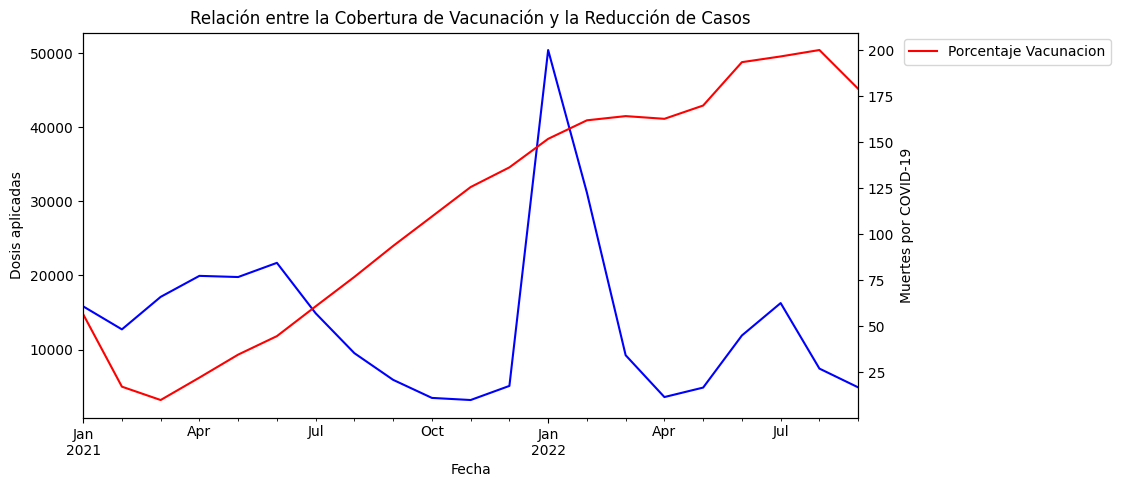

In [60]:
# Crear una figura y dos ejes
plt.figure(figsize=(10, 5))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Calcular porcentajes de vacunación
data_clean['porcentaje_vacunacion'] = (data_clean['cumulative_vaccine_doses_administered'] / data_clean['population']) * 100

# Graficar nuevos confirmados y porcentaje de vacunación
data_clean.resample('M')['new_confirmed'].mean().plot(ax=ax1, color='blue', label='Nuevos Confirmados')
data_clean.resample('M')['porcentaje_vacunacion'].mean().plot(ax=ax2, color='red', label='Porcentaje Vacunacion')

# Personalizar etiquetas y título
ax1.set_ylabel('Dosis aplicadas')
ax2.set_ylabel('Muertes por COVID-19')
ax1.set_xlabel('Fecha')
plt.legend(bbox_to_anchor = (1.05 , 1), loc = 'upper left')
plt.title('Relación entre la Cobertura de Vacunación y la Reducción de Casos')

# Mostrar el gráfico
plt.show()


Se observa la relacion de a mayor vacunacion , el pico de contagios baja apçbruptmente

### Progreso de vacunacion por pais

Text(0.5, 1.0, 'Progreso de la vacunacion por pais')

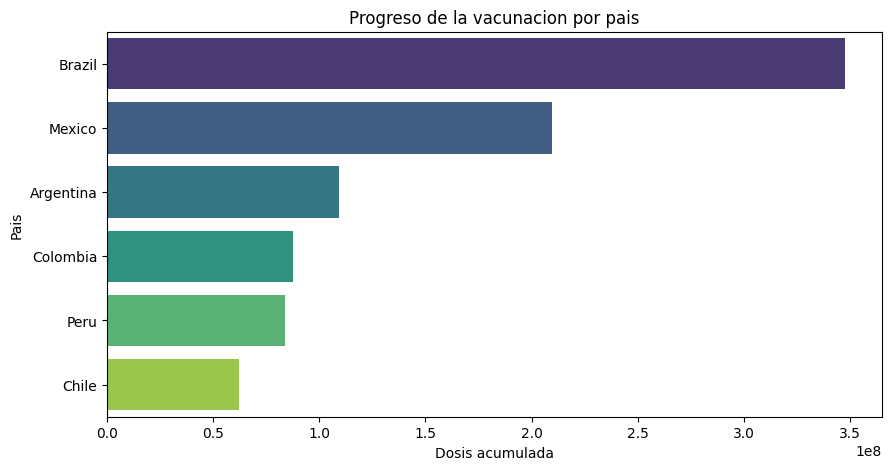

In [48]:
vacunacion_pais = data_clean.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending= False)

plt.figure (figsize=(10,5))
sns.barplot(x = vacunacion_pais.values, y= vacunacion_pais.index, hue =vacunacion_pais.index, palette= 'viridis')
plt.xlabel ( 'Dosis acumulada')
plt.ylabel ('Pais')
plt.title  ('Progreso de la vacunacion por pais') 


### Nuevos casos y temperatura promedio


In [49]:
plt.figure(figsize = (12,6))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(data_clean.resample('M').mean(numeric_only= True).index, data_clean.resample('M').mean(numeric_only= True)['new_confirmed'], color = 'red', label = 'Casos nuevos Confirmados')
ax2.plot(data_clean.resample('M').mean(numeric_only= True).index, data_clean.resample('M').mean(numeric_only= True)['average_temperature_celsius'], color = 'blue', label = 'Temperatura promedio')

ax1.set_xlabel ('Fecha' )
ax1.set_ylabel ('Nuevos confirmados', color= 'red')
ax2.set_ylabel('Temperatura promedio Cº ',color = 'blue')

sns.lineplot()
plt.title('Nuevos casos y temperatura promedio')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_12472\2004439923.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax1.plot(data_clean.resample('M').mean(numeric_only= True).index, data_clean.resample('M').mean(numeric_only= True)['new_confirmed'], color = 'red', label = 'Casos nuevos Confirmados')
C:\Users\User\AppData\Local\Temp\ipykernel_12472\2004439923.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax2.plot(data_clean.resample('M').mean(numeric_only= True).index, data_clean.resample('M').mean(numeric_only= True)['average_temperature_celsius'], color = 'blue', label = 'Temperatura promedio')


### Impacto de la Urbanización en la Propagación del Covid-19

C:\Users\User\AppData\Local\Temp\ipykernel_12472\2027894709.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = casos_urbanos['urban_population_percentage'], y = casos_urbanos.index, palette ='viridis' )


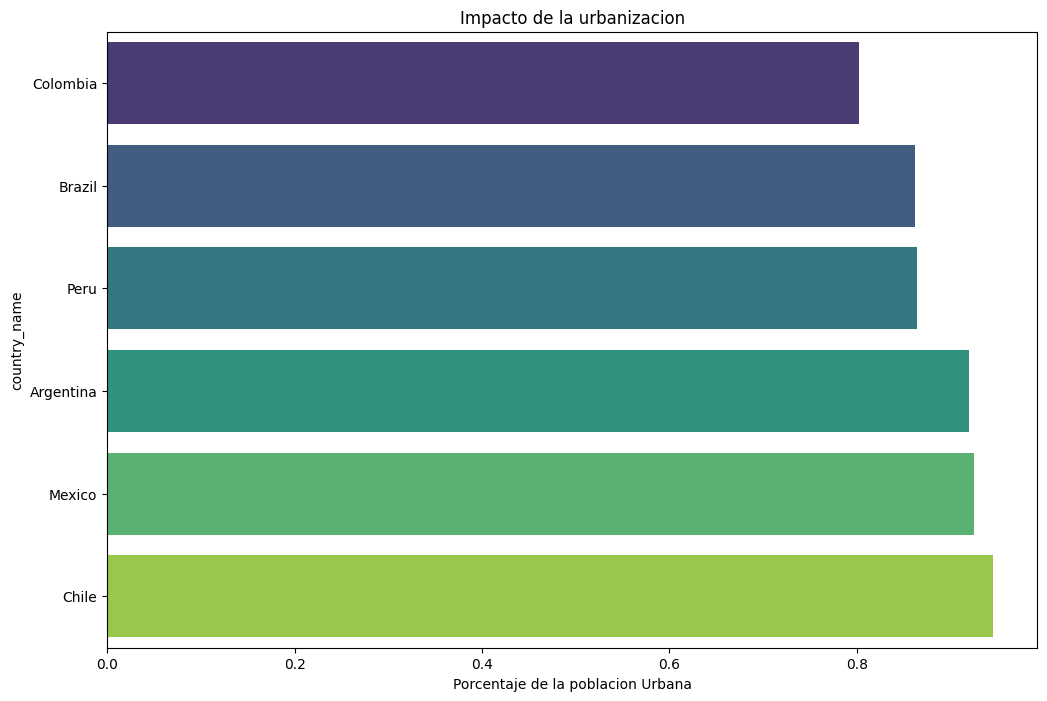

In [50]:
data_clean['urban_population_percentage']= data_clean['population_urban'] / data_clean ['population']
casos_urbanos= data_clean.groupby('country_name').last().sort_values(by = 'urban_population_percentage')

plt.figure(figsize = (12 ,8))  
sns.barplot(x = casos_urbanos['urban_population_percentage'], y = casos_urbanos.index, palette ='viridis' )
ax2.set_ylabel('Temperatura promedio Cº ',color = 'blue')

plt.xlabel('Porcentaje de la poblacion Urbana')
plt.title('Impacto de la urbanizacion')
plt.show()


### Distribución de la Población por Edad en Países

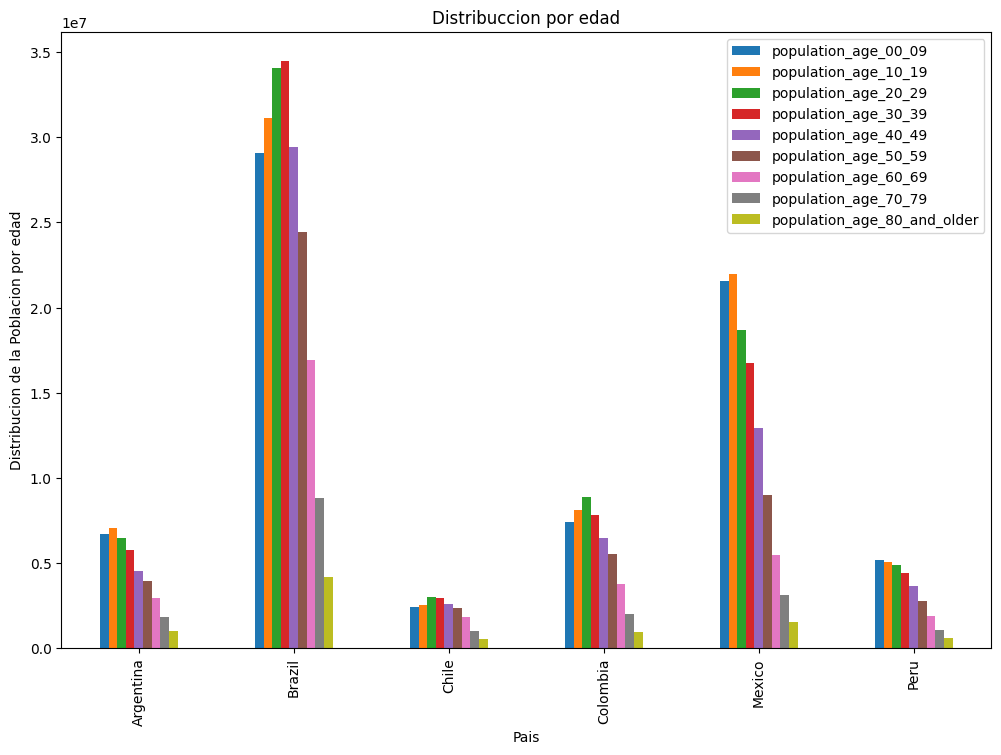

In [51]:
mortalidad_pais_alta = data_clean.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending = False).index 
grupo_de_edad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older']
distribucion_edad = data_clean[data_clean['country_name'].isin(mortalidad_pais_alta)].groupby('country_name')[grupo_de_edad].mean()

distribucion_edad.plot(kind= 'bar', figsize=(12,8))
plt.xlabel('Pais')
plt.ylabel ('Distribucion de la Poblacion por edad')
plt.title('Distribuccion por edad')
plt.show()
# inuto 42


### Comparacion de estrategias de vacunacion 

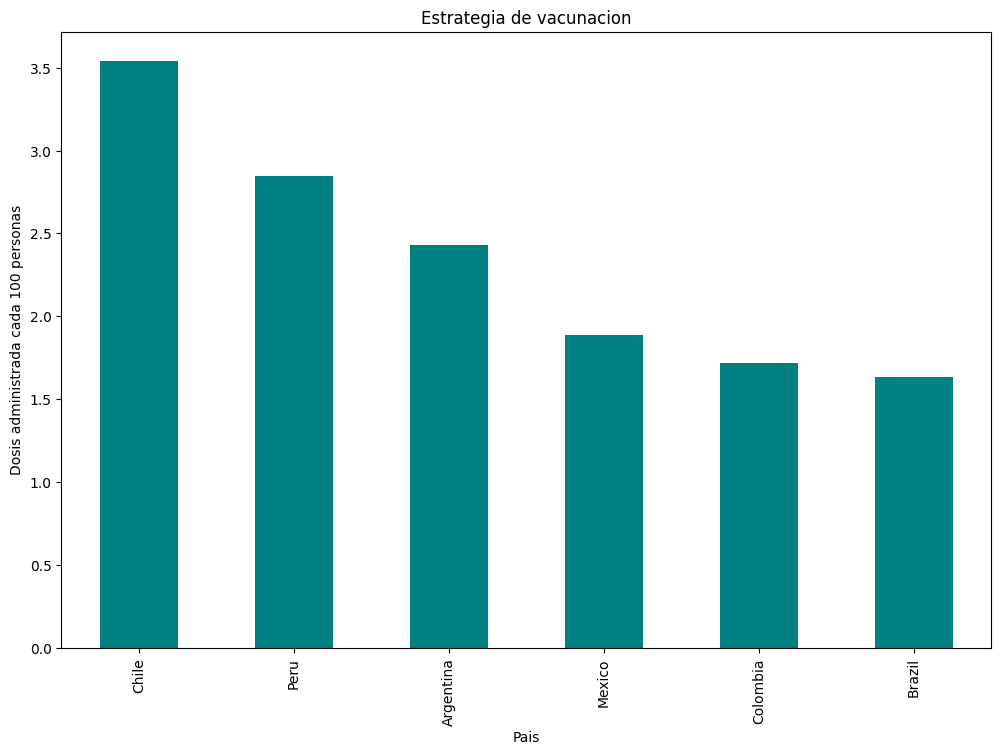

In [52]:
estrategia_de_vacunacion = data_clean.groupby('country_name')['cumulative_vaccine_doses_administered'].max()/ data_clean.groupby('country_name')['population'].max()
estrategia_de_vacunacion.sort_values(ascending = False).plot(kind= 'bar', figsize= (12,8), color = 'teal')

plt.xlabel('Pais')
plt.ylabel('Dosis administrada cada 100 personas')
plt.title ('Estrategia de vacunacion')
plt.show()


### Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad

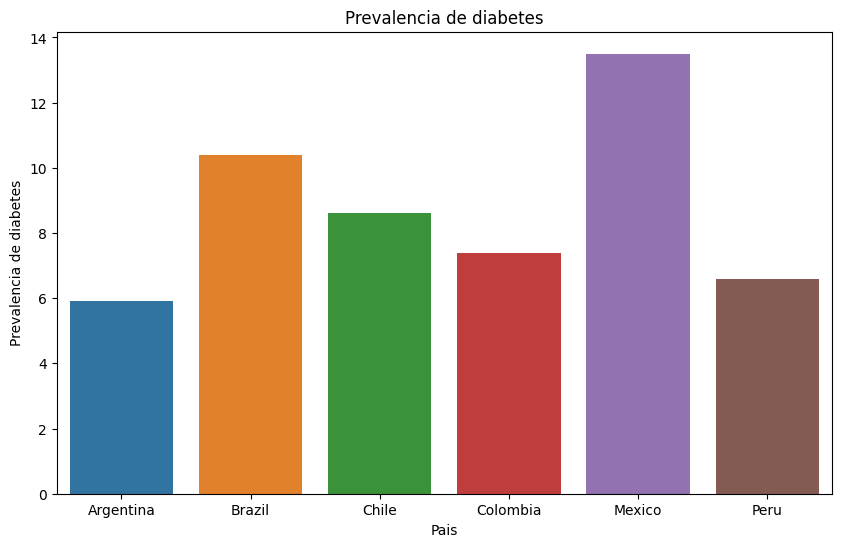

In [53]:
# Prevalencia de diabetes
top_countries = data_clean.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index
botton_countries = data_clean.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index
condition_data = data_clean[data_clean['country_name'].isin(top_countries.union(botton_countries))]

plt.figure(figsize= (10,6))
sns.barplot (data=condition_data , x= 'country_name', y = 'diabetes_prevalence', hue = 'country_name')
plt.xlabel('Pais')
plt.ylabel('Prevalencia de diabetes')
plt.title('Prevalencia de diabetes')
plt.show()


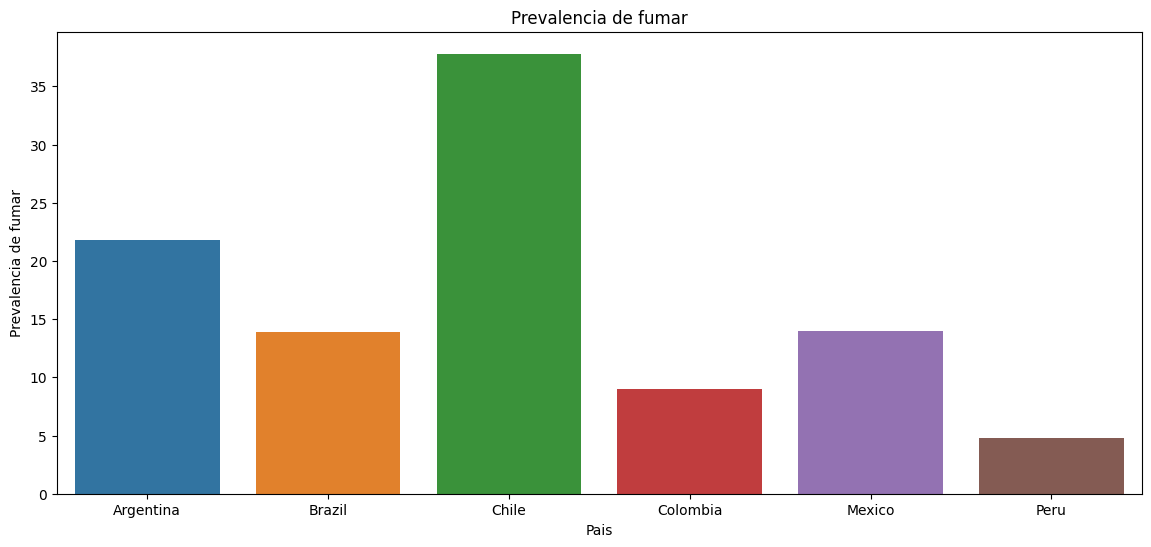

In [54]:
# fumar
plt.figure(figsize = (14,6))
sns.barplot(data = condition_data , x='country_name', y= 'smoking_prevalence', hue ='country_name')
plt.xlabel('Pais')
plt.ylabel('Prevalencia de fumar')
plt.title('Prevalencia de fumar')
plt.show()


### Evolución del Número de Muertes Diarias

El valor máximo en la columna 'new_deceased' es: 11447.0


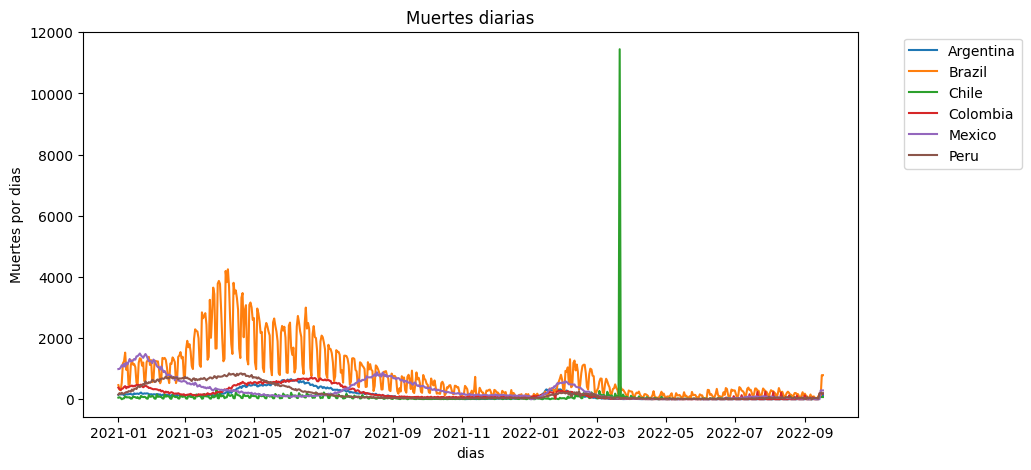

In [56]:
valor_maximo = data_clean['new_deceased'].max()
print(f"El valor máximo en la columna 'new_deceased' es: {valor_maximo}")

data_clean['fecha']= data_clean.index
muertes_diarias = data_clean.groupby(['country_name', 'fecha'])['new_deceased'].sum().reset_index()

plt.figure(figsize = (10,5))
for country in muertes_diarias['country_name'].unique():
    paises_muertes_diarias= muertes_diarias[muertes_diarias['country_name']== country]
    plt.plot(paises_muertes_diarias['fecha'], paises_muertes_diarias['new_deceased'], label = country)

plt.xlabel('dias')
plt.ylabel('Muertes por dias')
plt.title('Muertes diarias')
plt.legend(bbox_to_anchor = (1.05 , 1), loc = 'upper left')
plt.show()




Caso irregular en Chile

### Variación Mensual de Casos y Muertes

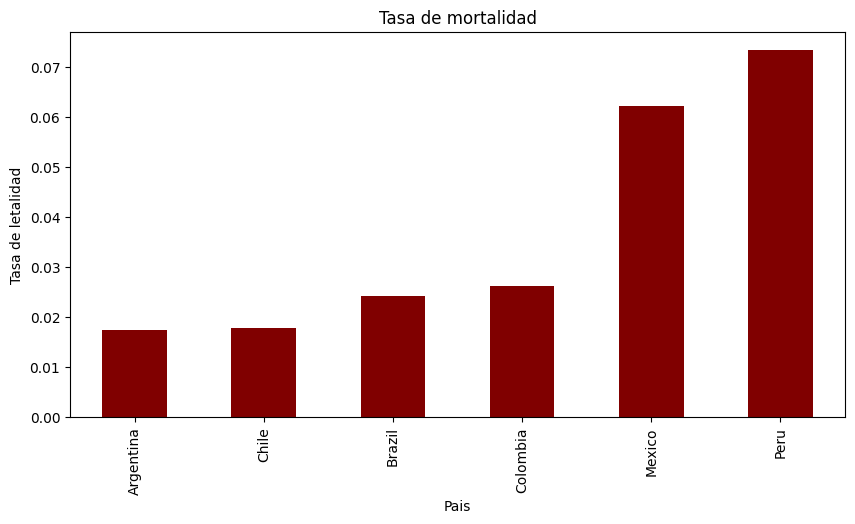

In [57]:
data_clean['case_fatality_rate']= data_clean['cumulative_deceased'] / data_clean['cumulative_confirmed']
fatality_rates = data_clean.groupby('country_name')['case_fatality_rate'].last().sort_values()


plt.figure(figsize=(10,5))
bars = fatality_rates.plot(kind = 'bar', color = 'maroon')

plt.xlabel('Pais')
plt.ylabel('Tasa de letalidad')
plt.title( 'Tasa de mortalidad')
plt.show()


### Comparacion de la situacion actual entre paises

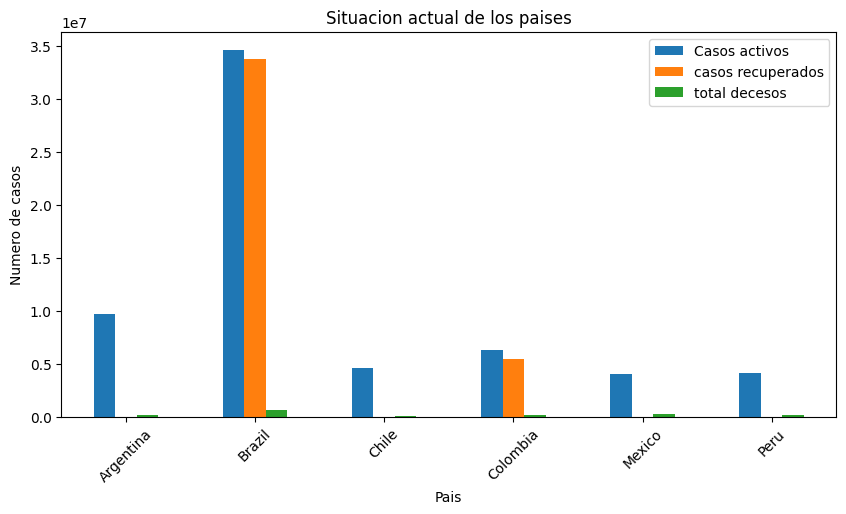

In [58]:
situacion_actual= data_clean.groupby('country_name').max()[['cumulative_confirmed','cumulative_recovered' ,'cumulative_deceased']]
situacion_actual.plot(kind = 'bar', stacked= False, figsize = (10,5))
plt.title('Situacion actual de los paises')
plt.xlabel('Pais')
plt.ylabel('Numero de casos')
plt.legend(['Casos activos', 'casos recuperados', 'total decesos'])
plt.xticks(rotation = 45)
plt.show()


In [59]:
# Guardamos los nuevs datos filtrados 
data_clean.to_csv('DatosFinalesFiltrado.csv', index=False)